
## Step 1: Understanding the Business Problem

#### Business Problem:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

There are three phases of customer lifecycle :
- The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.
- The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc.
- The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. 

#### Business Objective:
**The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.**

**Steps involved in solving the Classification problem:**

 - Understanding the Business Problem
 - Exploratory Data Analysis (EDA)
 - Feature Engineering
 - Model Building and Evaluation 

#### Imporing Libraries:

In [235]:
# Importing the libaries needed to solve the classification problem
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import IncrementalPCA
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

## Step 2: Data Preparation & Understanding:

#### Read the telecom data:

In [2]:
# read the telecom data
telecom = pd.read_csv("telecom_churn_dataset.csv")

In [3]:
# Display sample reords
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [4]:
# This shows the there are total 99999 rows and 226 columns present
telecom.shape

(99999, 226)

#### Display summary of the telecom data:

In [5]:
# To show the Summary of the telecom data for analysis
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

#### Display summary statistics :

In [6]:
# To show the Statistics of the numerical data in telecom data for analysis
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  25153.000000  25571.000000   
mean     132.395875  ...      0.084581      0.914404      0.908764   
std      297.207406  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        7.380000  ...      0.000000      1.000000      1.000000   
50%       34.310000  ...      0.000000      1.000000      1.000000   
75%      118.740000  ...      0.000000      1.000000      1.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

***Note***: ***The above summary shows that there are lot of null values present in the data and needs to be fixed***

In [7]:
# To show the Statistics of the Categorical data in telecom data for analysis
telecom.describe(include='O')

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
count                 99999                99398                98899   
unique                    1                    1                    1   
top               6/30/2014            7/31/2014            8/31/2014   
freq                  99999                99398                98899   

       last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
count                 98340               98392               98232   
unique                    1                  30                  31   
top               9/30/2014           6/30/2014           7/31/2014   
freq                  98340               16960               17288   

       date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
count                96377               95239                    25153   
unique                  31                  30                       30   
top              8/31/2014           9/29/2014                6/30/2014   
freq                 14706               22623                     1888   

       date_of_last_rech_data_7 date_of_last_rech_data_8  \
count                     25571                    26339   
unique                       31                       31   
top                   7/31/2014                8/31/2014   
freq                       1813                     1998   

       date_of_last_rech_data_9  
count                     25922  
unique                       30  
top                   9/29/2014  
freq                       2329

#### Display percentage of null values in each columns:

In [8]:
# The below represents the percentage of null values in each columns in the telecom data
round((100* telecom.isnull().sum() / len(telecom.index)), 2)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 226, dtype: float64

#### Display columns names that has more that 70% null values:

In [9]:
# To display columns which contains more than 70% null values
telecom.columns[round((100* telecom.isnull().sum() / len(telecom.index)), 2)> 70]

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

### a) Filter the High Value Customers:

**Definition:** Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

**Note**: In order to calculate average recharge amount, we need to find out total recharge amount and 

In [10]:
# Get the column name that has total recharge, recharge data & average recharge because these variables
# is being used to identify the high value customers
[col for col in telecom.columns for x in ['total_rech','rech_data', 'av_rech'] if x in col]

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_8',
 'total_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

### b) Derive new features:

##### Check the total number of null values present in the `total_rech_data* & av_rech_amt_data*`

In [11]:
print("The total null values in 'total_rech_data_6':", telecom['total_rech_data_6'].isnull().sum())
print("The total null values in 'total_rech_data_7':", telecom['total_rech_data_7'].isnull().sum())
print("The total null values in 'total_rech_data_8':", telecom['total_rech_data_8'].isnull().sum())
print("The total null values in 'total_rech_data_9':", telecom['total_rech_data_9'].isnull().sum())
print("The total null values in 'av_rech_amt_data_6':", telecom['av_rech_amt_data_6'].isnull().sum())
print("The total null values in 'av_rech_amt_data_7':", telecom['av_rech_amt_data_7'].isnull().sum())
print("The total null values in 'av_rech_amt_data_8':", telecom['av_rech_amt_data_8'].isnull().sum())
print("The total null values in 'av_rech_amt_data_9':", telecom['av_rech_amt_data_9'].isnull().sum())

The total null values in 'total_rech_data_6': 74846
The total null values in 'total_rech_data_7': 74428
The total null values in 'total_rech_data_8': 73660
The total null values in 'total_rech_data_9': 74077
The total null values in 'av_rech_amt_data_6': 74846
The total null values in 'av_rech_amt_data_7': 74428
The total null values in 'av_rech_amt_data_8': 73660
The total null values in 'av_rech_amt_data_9': 74077


**Note**: The null values is because there are no recharge done during these months. And, we need these columns for calculating the Average recharge amount and so null (NaN) values needs to be imputed as zeros.

#### Impute Null values to zero for the above attributes

In [12]:
# Impute the null values to zeroes
telecom['total_rech_data_6'].fillna(value=0, inplace=True)
telecom['total_rech_data_7'].fillna(value=0, inplace=True)
telecom['total_rech_data_8'].fillna(value=0, inplace=True)
telecom['total_rech_data_9'].fillna(value=0, inplace=True)
telecom['av_rech_amt_data_6'].fillna(value=0, inplace=True)
telecom['av_rech_amt_data_7'].fillna(value=0, inplace=True)
telecom['av_rech_amt_data_8'].fillna(value=0, inplace=True)
telecom['av_rech_amt_data_9'].fillna(value=0, inplace=True)

#### Calculate total recharge amount for each months:

In [13]:
# Calculation for total recharge amount for each month (6, 7, 8, 9)
telecom["total_rech_data_amt_6"] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom["total_rech_data_amt_7"] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
telecom["total_rech_data_amt_8"] = telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']
telecom["total_rech_data_amt_9"] = telecom['total_rech_data_9'] * telecom['av_rech_amt_data_9']

***Note:*** The columns that are being used above can be dropped since it is not needed anymore.

#### Drop the columns that are not needed :

In [14]:
# Drop the columns that are not needed.
cols_to_drop = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
               'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
               'av_rech_amt_data_9']

telecom.drop(cols_to_drop, axis=1, inplace=True)

#### Calculate 70th percentile of the Average Recharge Amount in first two months (6 & 7 months)

In [15]:
# Calulating Avg Recharge amount
telecom['avg_rech_amt'] = (telecom["total_rech_amt_6"] + telecom["total_rech_data_amt_6"]+
                           telecom["total_rech_amt_7"] + telecom["total_rech_data_amt_7"])/2.0

# Calculate 70th Percentile
cut_off_amt = telecom['avg_rech_amt'].quantile(0.70)

# calculate high value customer
telecom_hv_cust  = telecom[telecom['avg_rech_amt'] >= cut_off_amt]

print("70th Percentile of Avg Recharge Amount for 6th & 7th Month = {}".format(cut_off_amt))

70th Percentile of Avg Recharge Amount for 6th & 7th Month = 478.0


In [16]:
# Final summary of rows and columns
telecom_hv_cust.shape

(30001, 223)

***Note:*** There were 30001 records that satisfy the high values customers ie, the prediction will be on high value customers.

## Step 3: Exploratory Data Analysis (EDA)

#### Display the columns that has unique values:

In [17]:
# Compute the unique values
unique_val_cols = telecom_hv_cust.loc[:,telecom_hv_cust.apply(pd.Series.nunique) == 1]
unique_val_cols.head()

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0         109             0.0             0.0             0.0   
7         109             0.0             0.0             0.0   
8         109             0.0             0.0             0.0   
21        109             0.0             0.0             0.0   
23        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
21            6/30/2014            7/31/2014            8/31/2014   
23            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  \
0             9/30/2014               NaN               NaN               0.0   
7             9/30/2014               0.0               0.0               0.0   
8             9/30/2014               0.0               0.0               0.0   
21            9/30/2014               0.0               0.0               0.0   
23            9/30/2014               0.0               0.0               0.0   

    std_og_t2c_mou_9  std_ic_t2o_mou_6  std_ic_t2o_mou_7  std_ic_t2o_mou_8  \
0                NaN               NaN               NaN               0.0   
7                NaN               0.0               0.0               0.0   
8                0.0               0.0               0.0               0.0   
21               0.0               0.0               0.0               0.0   
23               0.0               0.0               0.0               0.0   

    std_ic_t2o_mou_9  
0                NaN  
7                NaN  
8                0.0  
21               0.0  
23               0.0

***Note***: The above shown unique values in these columns will not contribute in predicting data. So, these columns can be dropped.

#### Drop the columns that has unique values:

In [18]:
# Drop the unique values
telecom_hv_cust = telecom_hv_cust.loc[:,telecom_hv_cust.apply(pd.Series.nunique) != 1]
telecom_hv_cust.shape

(30001, 207)

### a) Tag Churners based on Business requirement:

**Those who have not made any calls (neither incoming nor outgoing) and have not being used internet atleast once during the churn phase can be considered as "Churn" otherwise "No Churn".**<br>
- **Churn --> 1** <br>
- **No Churn --> 0**

In [19]:
# Create function to map Churn and No Churn data
def convert_churn(c):
    if((c['total_ic_mou_9'] <= 0) & (c['total_og_mou_9'] <= 0) &
       (c['vol_2g_mb_9'] <= 0) & (c['vol_3g_mb_9'] <= 0)):
            
        return 1
    else:
        return 0

In [20]:
# Assign Churn and No Churn data into new columns
telecom_hv_cust['Churn'] = telecom_hv_cust.apply(convert_churn, axis=1)

**Note:** ***Once the Churn column is created, we need to delete churn related columns that has "_9" or "sept" from dataframe.***

#### Drop the columns related to churn for Sept/9th month:

In [21]:
# Drop the columns having _9 and sep
telecom_hv_cust = telecom_hv_cust.loc[:,~telecom_hv_cust.columns.str.startswith('sep')]
telecom_hv_cust = telecom_hv_cust.loc[:,~telecom_hv_cust.columns.str.endswith('_9')]

In [22]:
# calculate the churn rate
(sum(telecom_hv_cust['Churn']) / len(telecom_hv_cust['Churn'].index))*100

8.136395453484884

***The Churn rate looks like 8.13%***

#### Drop the rows that contains 55 percent of missing data:

In [23]:
telecom_hv_cust = telecom_hv_cust[(telecom_hv_cust.isnull().sum(axis=1)/telecom_hv_cust.shape[1])*100 < 56]

In [24]:
# Check the rows and columns after dropping. This has been reduced to 29902 records
telecom_hv_cust.shape

(29902, 157)

### b) Visualize the data using plots:

#### 1) Using Bar Plots 

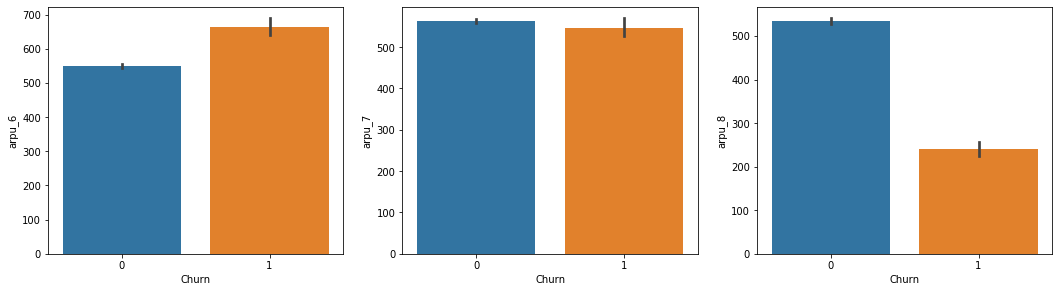

In [25]:
#Creating Bar Plot
plt.figure(figsize=(18, 10))
plt.subplot(2,3,1)
sns.barplot(x = 'Churn', y = 'arpu_6', data = telecom_hv_cust)
plt.subplot(2,3,2)
plt.ylabel('Avg Rev Month 7')
sns.barplot(x = 'Churn', y = 'arpu_7', data = telecom_hv_cust)
plt.subplot(2,3,3)
plt.ylabel('Avg Rev Month 8')
sns.barplot(x = 'Churn', y = 'arpu_8', data = telecom_hv_cust)
plt.show()

***Note:The above plot shows that average revenue per user drops in 8th month indicates Churn behaviour***

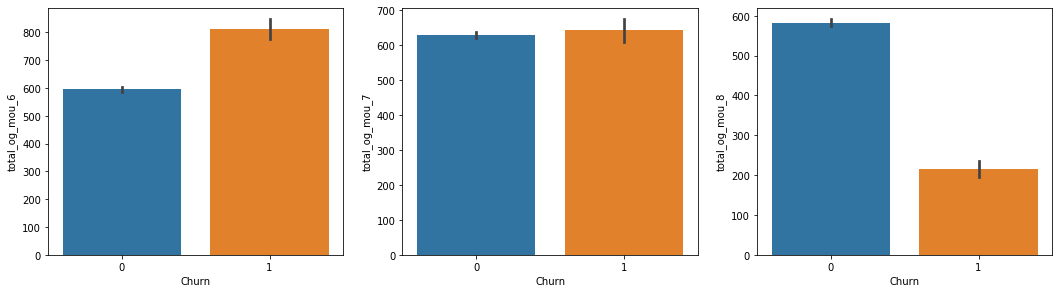

In [26]:
#Creating Bar Plot
plt.figure(figsize=(18, 10))
plt.subplot(2,3,1)
sns.barplot(x = 'Churn', y = 'total_og_mou_6', data = telecom_hv_cust)
plt.subplot(2,3,2)
sns.barplot(x = 'Churn', y = 'total_og_mou_7', data = telecom_hv_cust)
plt.subplot(2,3,3)
sns.barplot(x = 'Churn', y = 'total_og_mou_8', data = telecom_hv_cust)
plt.show()

***Note:The above plot shows that outgoing mins calls per month drops in 8th month indicates Churn behaviour***

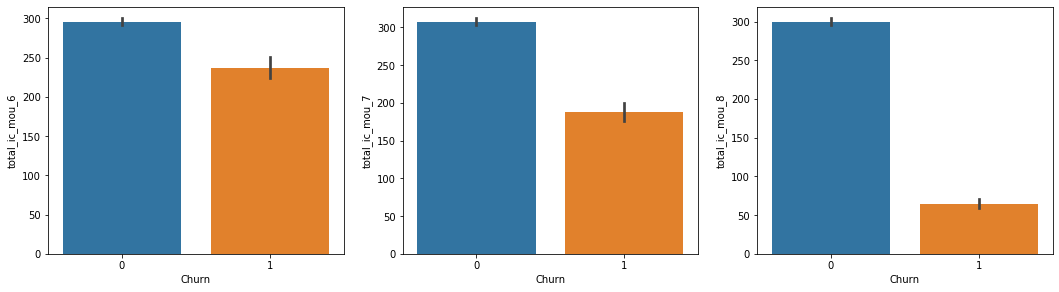

In [27]:
#Creating Bar Plot
plt.figure(figsize=(18, 10))
plt.subplot(2,3,1)
sns.barplot(x = 'Churn', y = 'total_ic_mou_6', data = telecom_hv_cust)
plt.subplot(2,3,2)
sns.barplot(x = 'Churn', y = 'total_ic_mou_7', data = telecom_hv_cust)
plt.subplot(2,3,3)
sns.barplot(x = 'Churn', y = 'total_ic_mou_8', data = telecom_hv_cust)
plt.show()

***Note:The above plot shows that incoming call usage per month drops in 8th month indicates Churn behaviour***

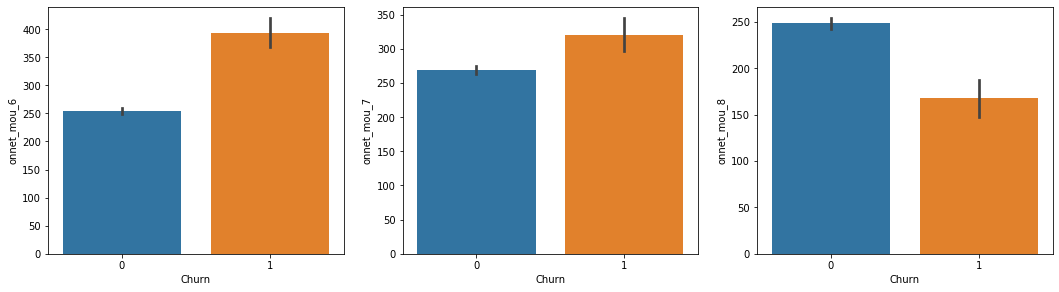

In [28]:
#Creating Bar Plot
plt.figure(figsize=(18, 10))
plt.subplot(2,3,1)
sns.barplot(x = 'Churn', y = 'onnet_mou_6', data = telecom_hv_cust)
plt.subplot(2,3,2)
sns.barplot(x = 'Churn', y = 'onnet_mou_7', data = telecom_hv_cust)
plt.subplot(2,3,3)
sns.barplot(x = 'Churn', y = 'onnet_mou_8', data = telecom_hv_cust)
plt.show()

***Note:The above plot shows that same operator/network calls per month drops in 8th month indicates Churn behaviour***

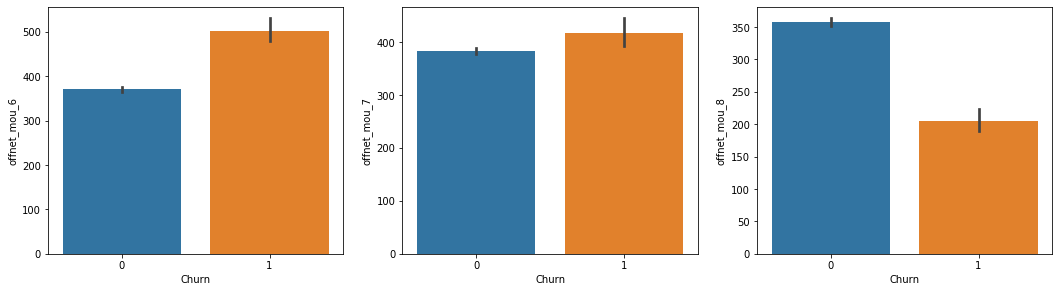

In [29]:
#Creating Bar Plot
plt.figure(figsize=(18, 10))
plt.subplot(2,3,1)
sns.barplot(x = 'Churn', y = 'offnet_mou_6', data = telecom_hv_cust)
plt.subplot(2,3,2)
sns.barplot(x = 'Churn', y = 'offnet_mou_7', data = telecom_hv_cust)
plt.subplot(2,3,3)
sns.barplot(x = 'Churn', y = 'offnet_mou_8', data = telecom_hv_cust)
plt.show()

***Note:The above plot shows that different operator/network calls per month drops in 8th month indicates Churn behaviour***

***From all the above plots, it shows that month 6 & 7 is a good phase. So, merging values from these months would give a better figure for further analysis***

#### 2) Using Correlation matrix:

In [30]:
# Create new features for each metrics
recharge_data = telecom_hv_cust.loc[:,telecom_hv_cust.columns.str.contains('rech')]
total_data = telecom_hv_cust.loc[:,telecom_hv_cust.columns.str.contains('tot')]
amt_data = telecom_hv_cust.loc[:,telecom_hv_cust.columns.str.contains('amt')]
inc_mou_data = telecom_hv_cust.loc[:,(telecom_hv_cust.columns.str.contains('ic')
                                  & telecom_hv_cust.columns.str.contains('mou'))]
outg_mou_data = telecom_hv_cust.loc[:,(telecom_hv_cust.columns.str.contains('og')
                                  & telecom_hv_cust.columns.str.contains('mou'))]
net_mou_data = telecom_hv_cust.loc[:,telecom_hv_cust.columns.str.contains('net_mou')]   
data_2g = telecom_hv_cust.loc[:,telecom_hv_cust.columns.str.contains('2g')] 
data_3g = telecom_hv_cust.loc[:,telecom_hv_cust.columns.str.contains('3g')]  

In [31]:
# Check the sample data
recharge_data.head()

total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  \
0                  4                 3                 2               362   
7                  5                 5                 7              1580   
8                 19                21                14               437   
21                22                26                27               600   
23                 3                 5                 4                 0   

    total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  \
0                252               252             252             252   
7                790              3638            1580             790   
8                601               120              90             154   
21               680               718              50              50   
23               454               439               0             179   

    max_rech_amt_8 date_of_last_rech_6  ... count_rech_2g_6 count_rech_2g_7  \
0              252           6/21/2014  ...             0.0             0.0   
7             1580           6/27/2014  ...             NaN             NaN   
8               30           6/25/2014  ...             NaN             2.0   
21              50           6/30/2014  ...             NaN             NaN   
23             179           6/18/2014  ...             NaN             0.0   

   count_rech_2g_8 count_rech_3g_6 count_rech_3g_7  count_rech_3g_8  \
0              0.0             1.0             1.0              1.0   
7              NaN             NaN             NaN              NaN   
8              3.0             NaN             0.0              0.0   
21             NaN             NaN             NaN              NaN   
23             0.0             NaN             2.0              2.0   

    total_rech_data_amt_6  total_rech_data_amt_7  total_rech_data_amt_8  \
0                   252.0                  252.0                  252.0   
7                     0.0                    0.0                    0.0   
8                     0.0                  354.0                  207.0   
21                    0.0                    0.0                    0.0   
23                    0.0                  712.0                  540.0   

    avg_rech_amt  
0          559.0  
7         1185.0  
8          696.0  
21         640.0  
23         583.0  

[5 rows x 28 columns]

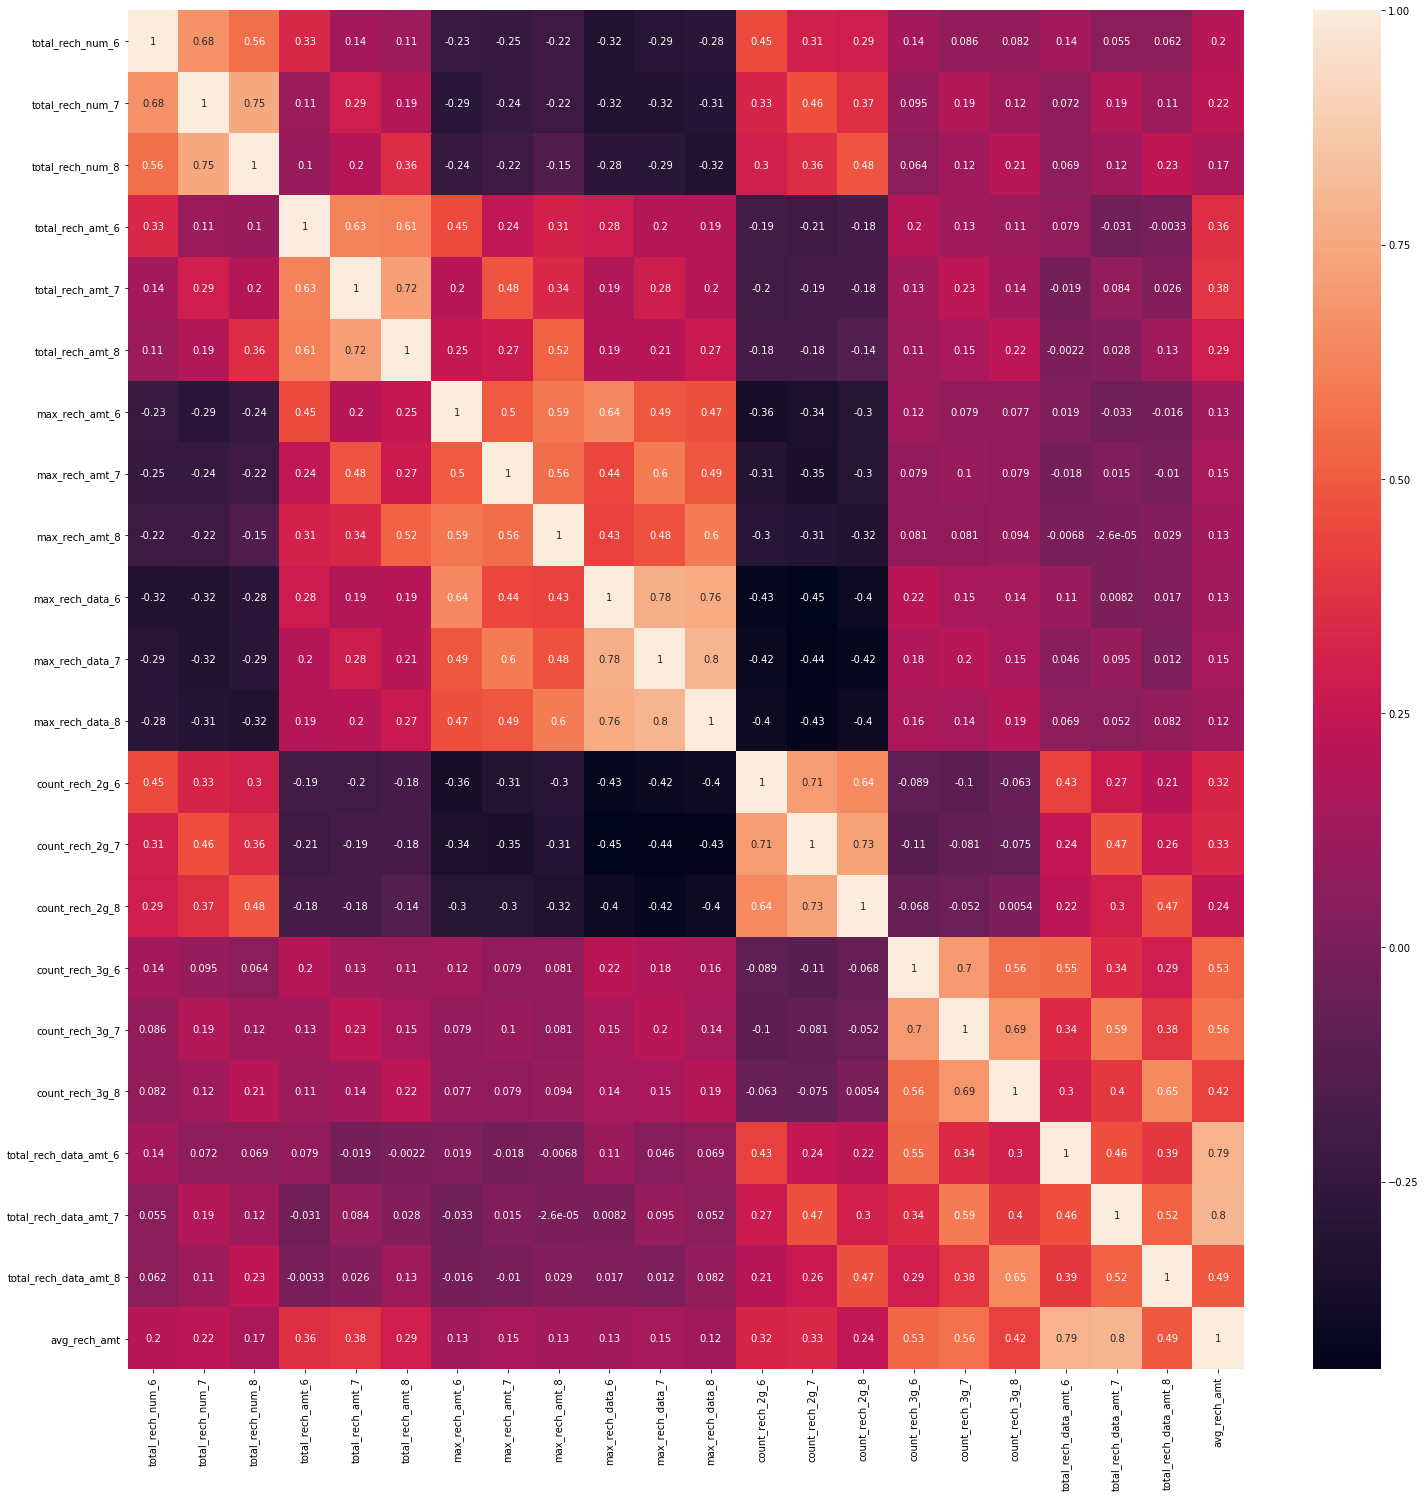

In [32]:
# Plot correlation matrix for recharge data
plt.figure(figsize=(25,25))
sns.heatmap(recharge_data.corr(), annot=True)
plt.show()

#### Observations:
- There is a high correlation 52% betweeen data recharge for month 7 & month 8.
- There is a high correlation 80% between avg_rech_amt and recharge for month 6 & month 7.

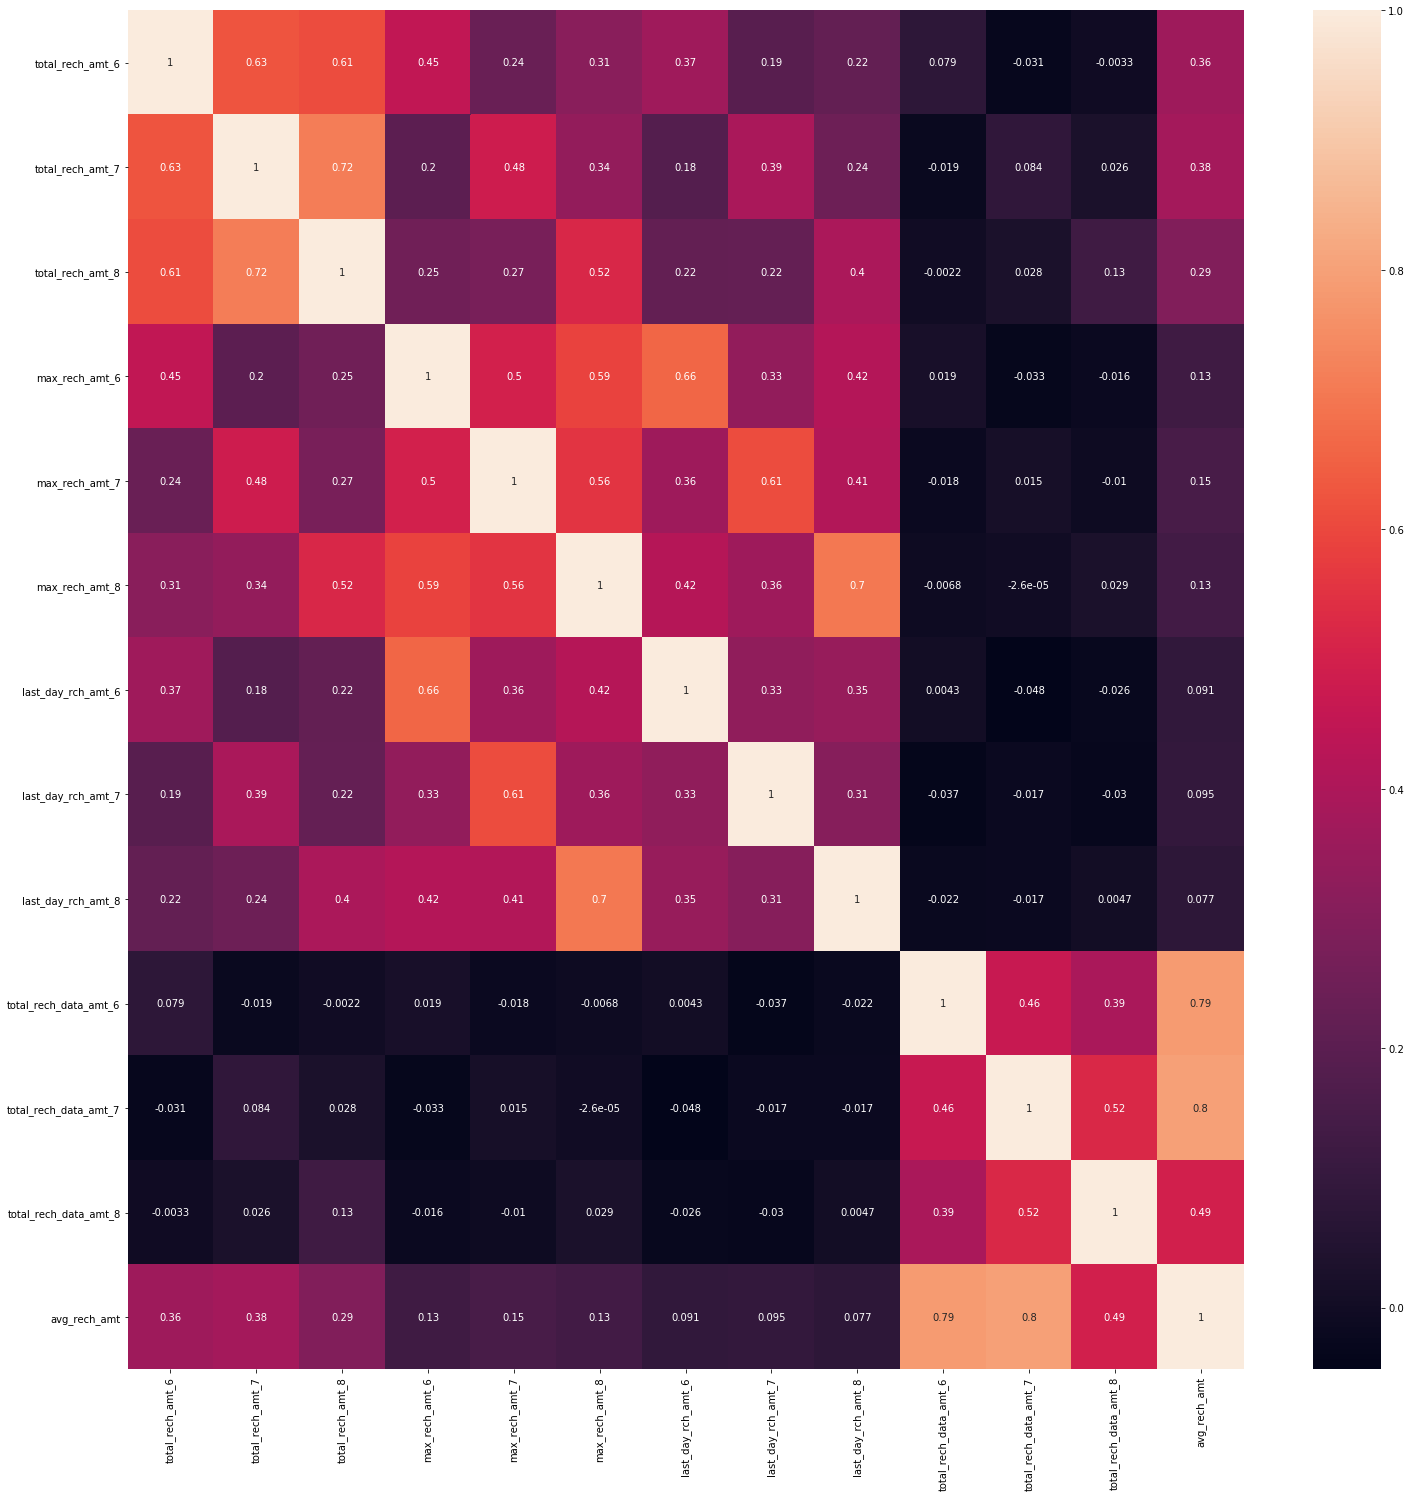

In [33]:
# Plot correlation matrix for amount data
plt.figure(figsize=(25,25))
sns.heatmap(amt_data.corr(), annot=True)
plt.show()

#### Observations:
- There is a high correlation 70% betweeen max recharge amount & last day recharge amount for 8th month. This shows that these customers will not Churn.

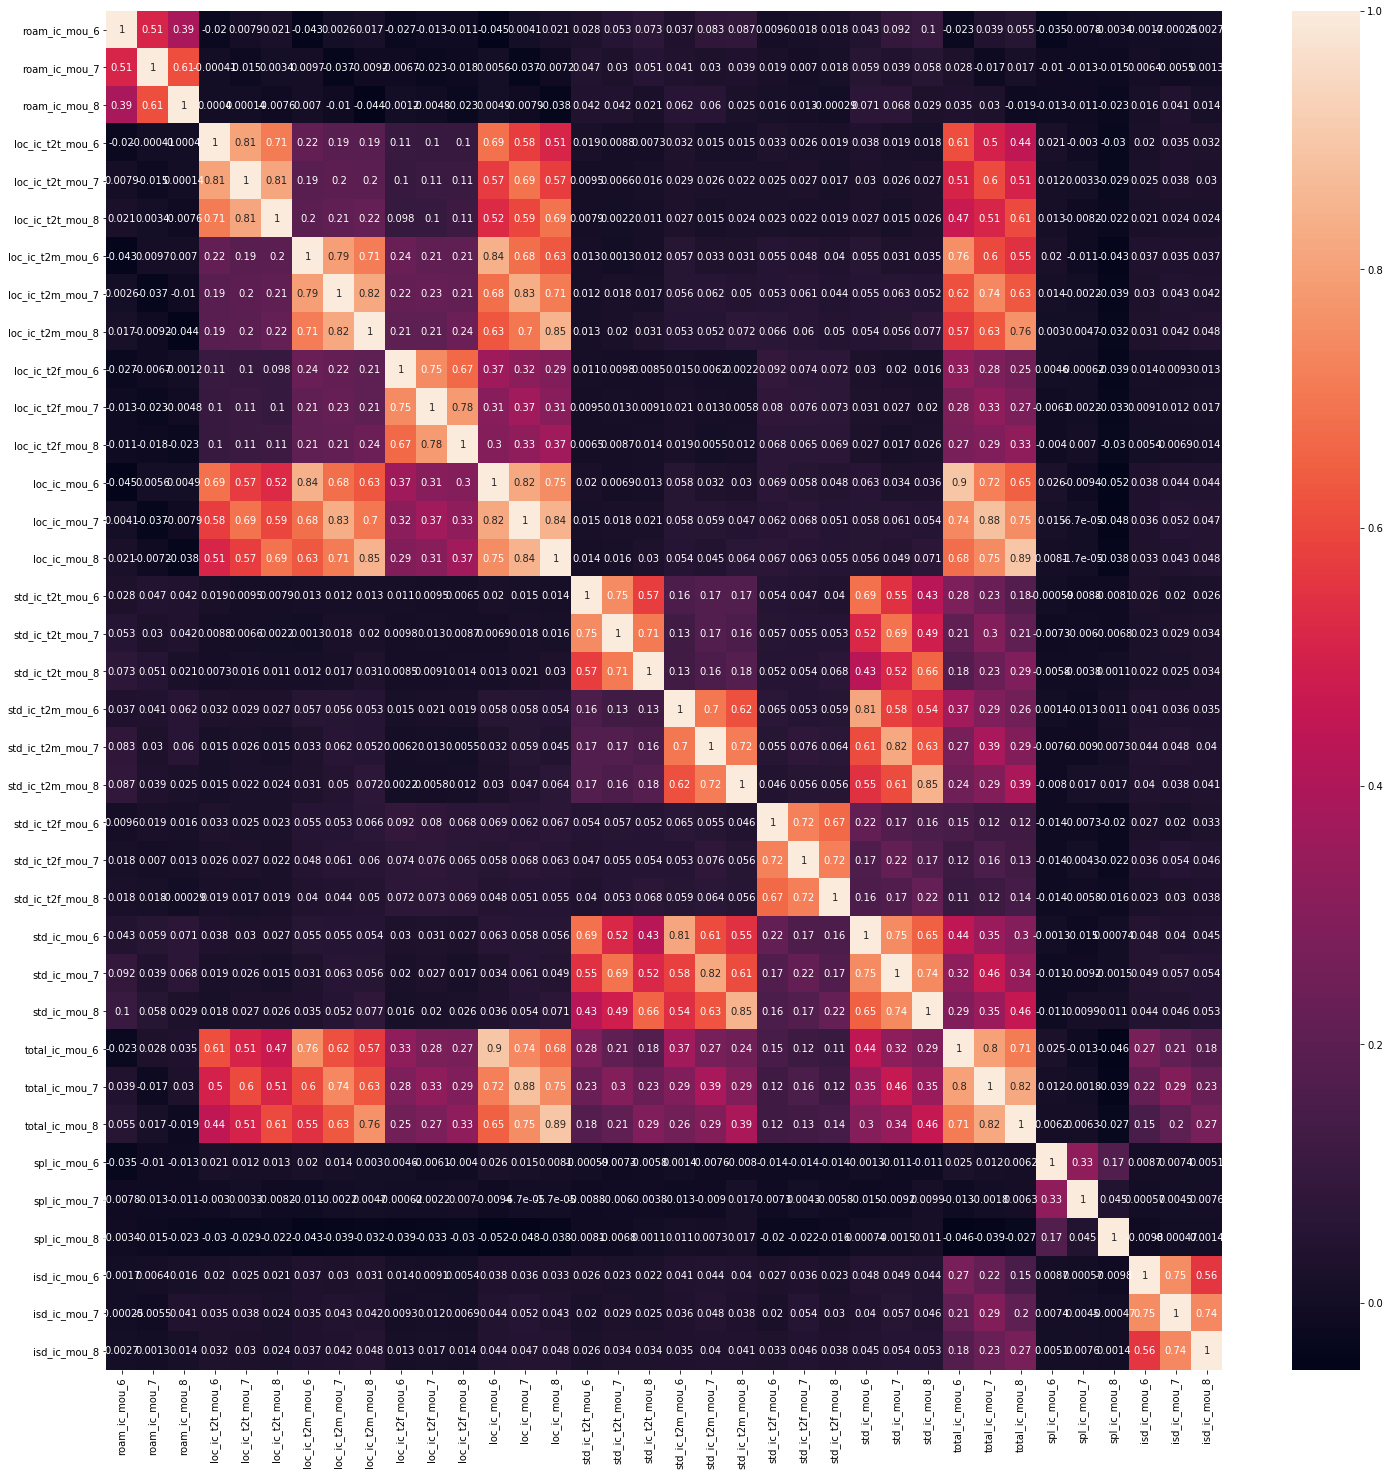

In [34]:
# Plot correlation matrix for incoming calls
plt.figure(figsize=(25,25))
sns.heatmap(inc_mou_data.corr(), annot=True)
plt.show()

#### Observations:
- There is a high correlation 82% betweeen total incoming calls for 7th and 8th month. This shows that these customers will not Churn.

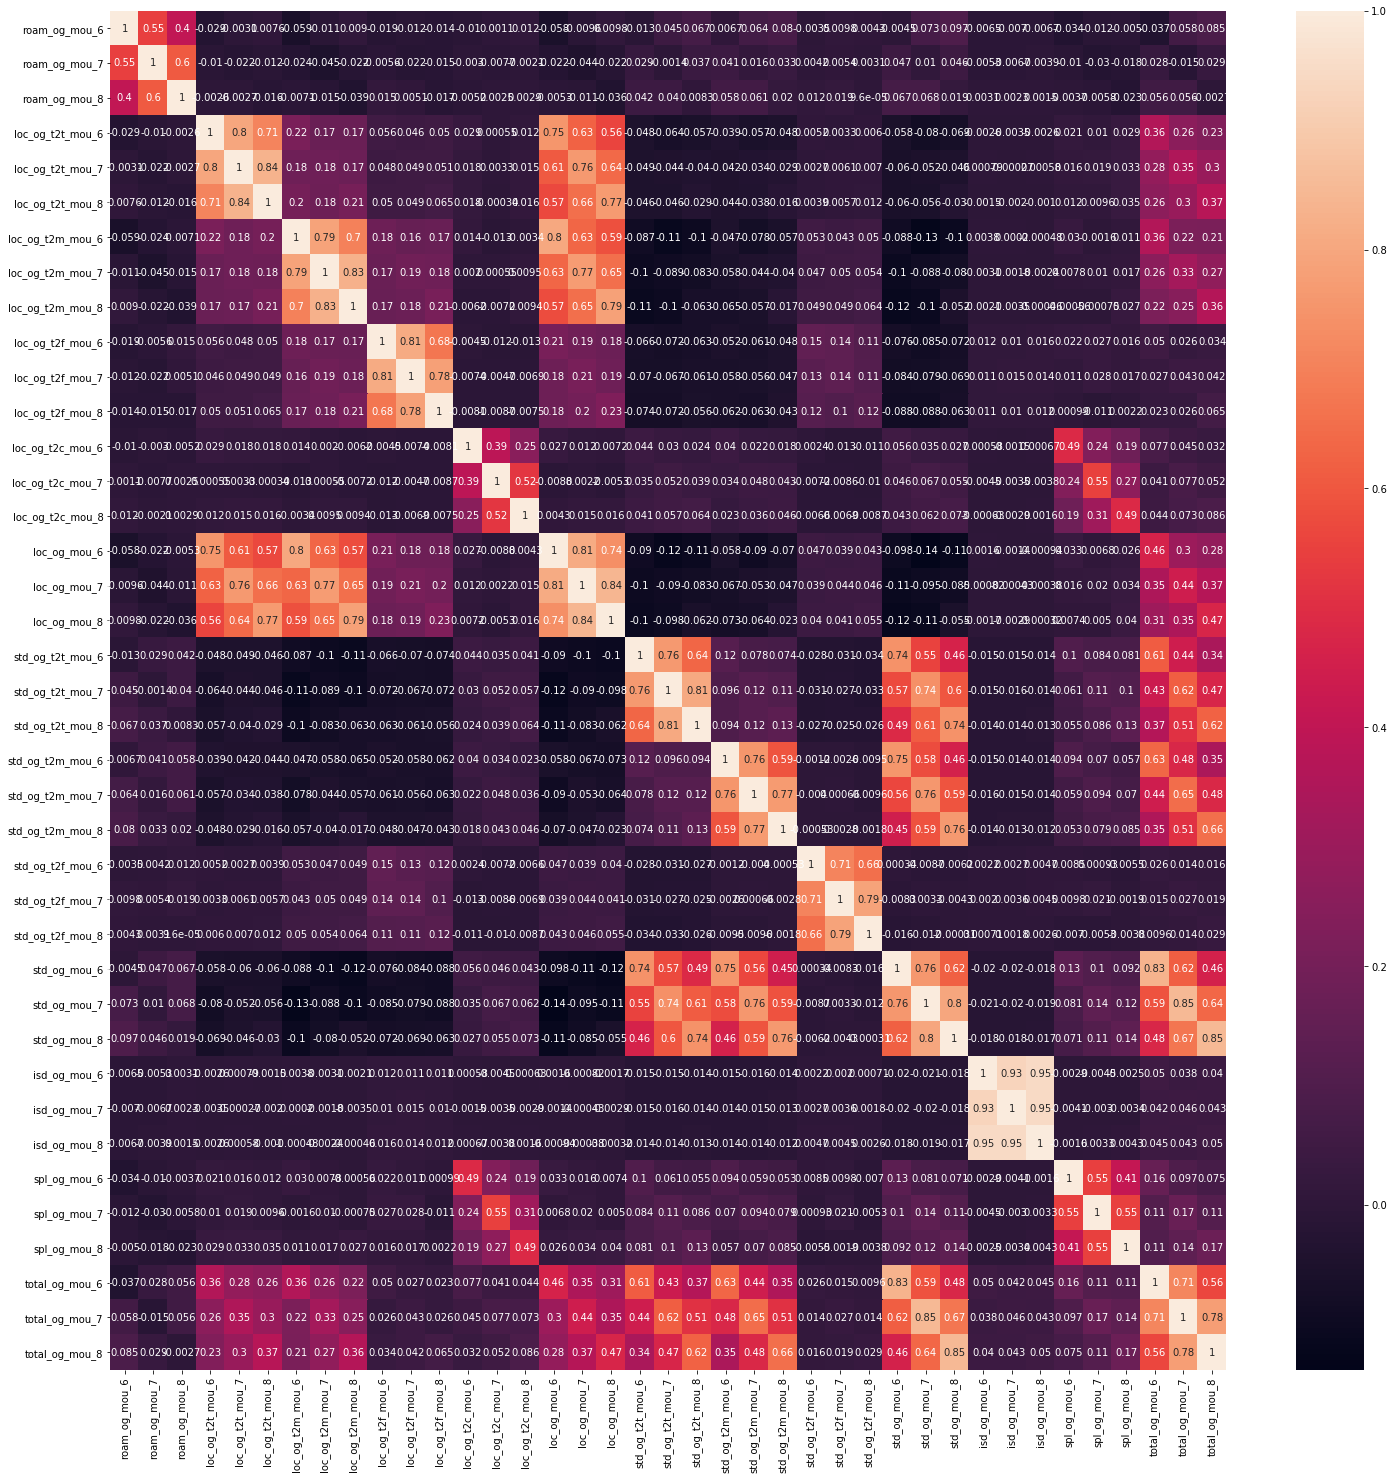

In [35]:
# Plot correlation matrix for Outgoing calls
plt.figure(figsize=(25,25))
sns.heatmap(outg_mou_data.corr(), annot=True)
plt.show()

#### Observations:
- There is a high correlation 78% betweeen total incoming calls for 7th and 8th month. This shows that these customers will not Churn.

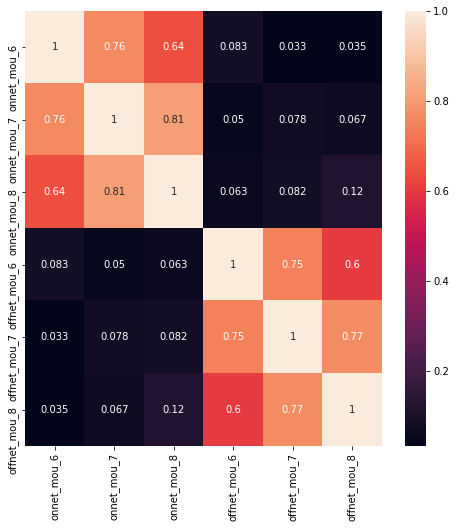

In [36]:
# Plot correlation matrix for net monthly data
plt.figure(figsize=(8,8))
sns.heatmap(net_mou_data.corr(), annot=True)
plt.show()

#### Observations:
- There is a High correlation between months 7 and 8 both for ONNET and OFFNET usage

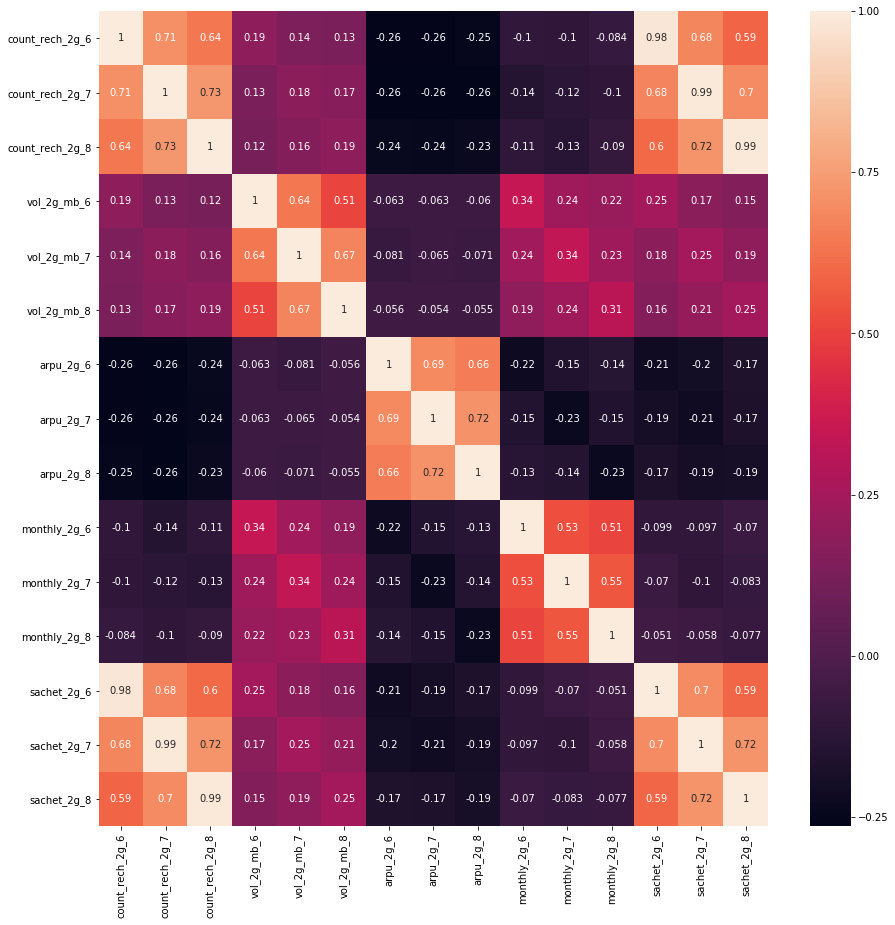

In [37]:
# Plot correlation matrix for 2G data
plt.figure(figsize=(15,15))
sns.heatmap(data_2g.corr(), annot=True)
plt.show()

#### Observations:
- Very High correlation between the Recharge Sachets and the Count of Recharges for all months

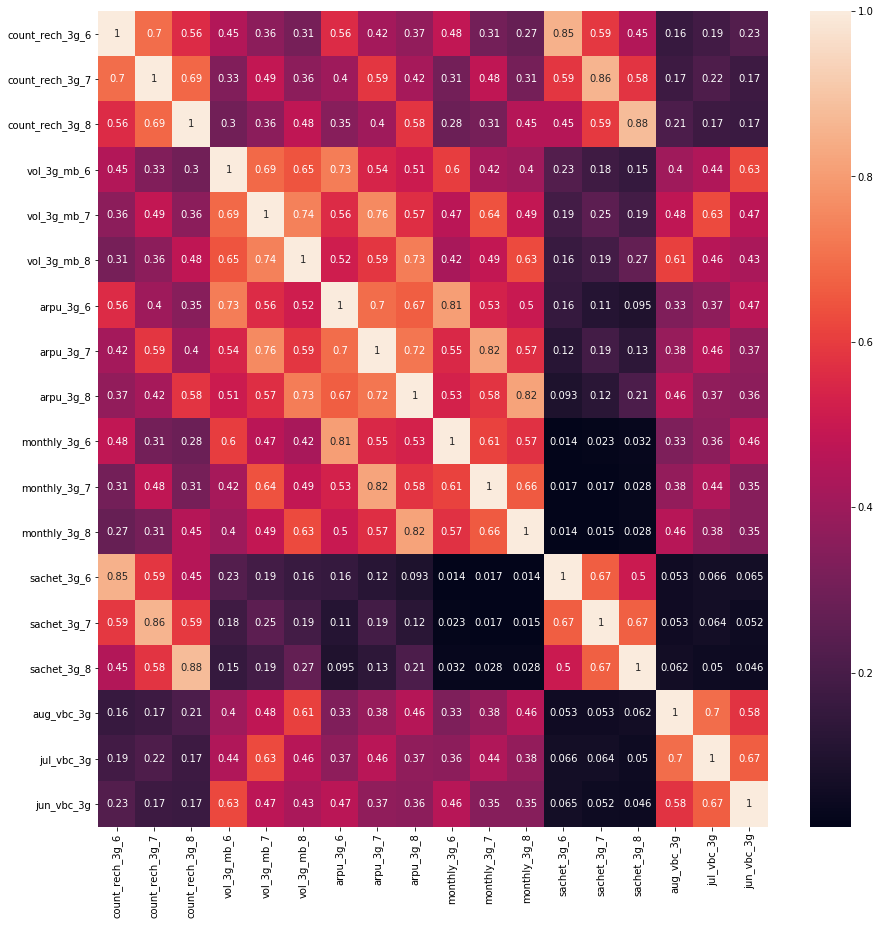

In [38]:
# Plot correlation matrix for 3G data
plt.figure(figsize=(15,15))
sns.heatmap(data_3g.corr(), annot=True)
plt.show()

#### Observations:
- 70% correlation between Average revenue per user and the 3G Volume of data usage for all Months

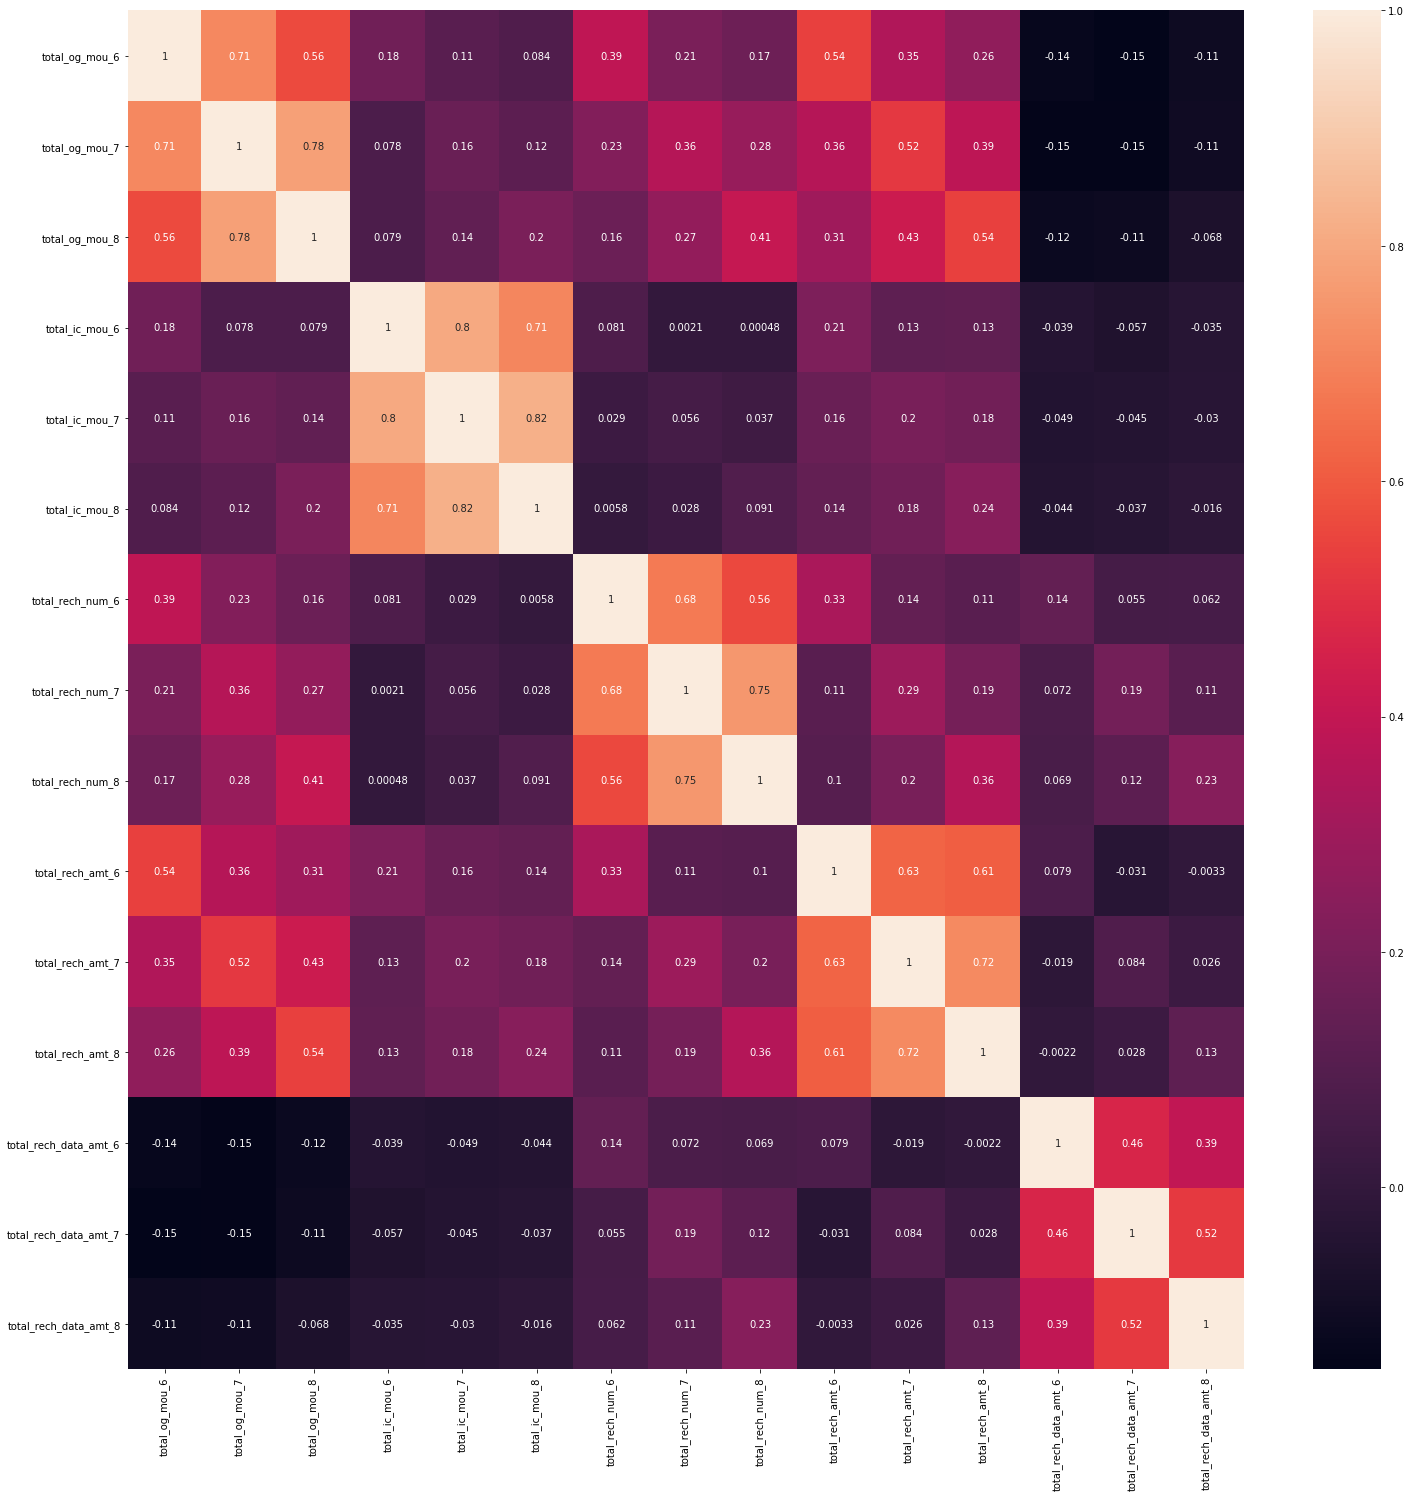

In [39]:
# Plot correlation matrix for total data
plt.figure(figsize=(25,25))
sns.heatmap(total_data.corr(), annot=True)
plt.show()

#### Observations:
- There is a high correlation 78% for outgoing calls betweeen month 7 & month 8.
- There is a high correlation 82% for incoming calls between month 7 & month 8.<br>

***Note:The above shown that these customers will not churn.***

#### 2) Using Scatter plot:

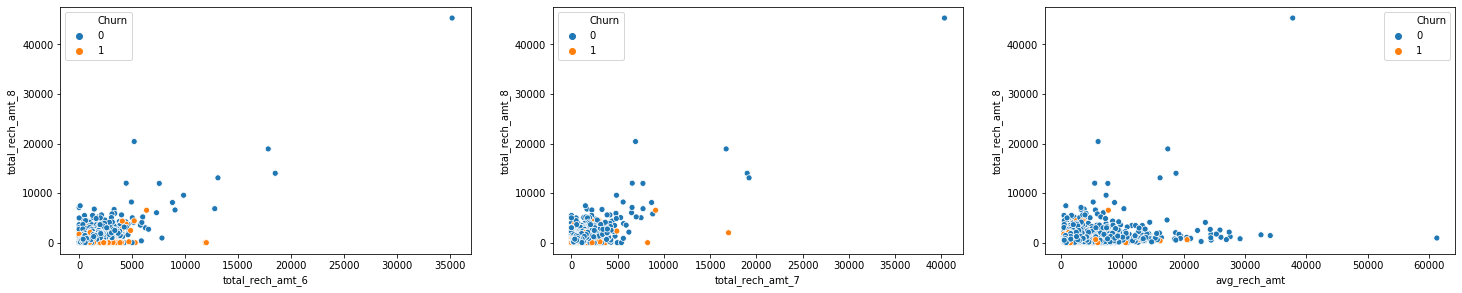

In [40]:
#Create scatter plot to understand distribution of amounts
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.scatterplot(x = 'total_rech_amt_6', y = 'total_rech_amt_8', data = telecom_hv_cust, hue = 'Churn')
plt.subplot(2,3,2)
sns.scatterplot(x = 'total_rech_amt_7', y = 'total_rech_amt_8', data = telecom_hv_cust, hue = 'Churn')
plt.subplot(2,3,3)
sns.scatterplot(x = 'avg_rech_amt', y = 'total_rech_amt_8', data = telecom_hv_cust, hue = 'Churn')
plt.show()

#### Drop columns that has more than 75% value as zero:

In [41]:
# Get the columns that has more than 75% as zero
per_df = (telecom_hv_cust[telecom_hv_cust == 0].count(axis=0) / len(telecom_hv_cust.index))*100
per_df_cols = per_df[per_df > 75].index
per_df_cols

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6',
       'isd_ic_mou_7', 'isd_ic_mou_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'Churn'],
      dtype='object')

In [42]:
# Remove churn column
per_df_cols = per_df_cols[per_df_cols != 'Churn']

#### Impute the Numerical & Categorical columns that has Null values (> 70%) with Zero:

##### Find Numerical columns:

In [43]:
# Select numerical columns
telecom_num = telecom_hv_cust.select_dtypes(include=np.number)

In [44]:
# Get the percentage of values
telecom_num_percnt = round((telecom_num.isnull().sum() / len(telecom_num.index))*100, 2)
cols = telecom_num_percnt[telecom_num_percnt >1]
cols

onnet_mou_6          1.49
onnet_mou_7          1.46
onnet_mou_8          3.60
offnet_mou_6         1.49
offnet_mou_7         1.46
                    ...  
night_pck_user_7    43.16
night_pck_user_8    46.71
fb_user_6           44.20
fb_user_7           43.16
fb_user_8           46.71
Length: 102, dtype: float64

In [45]:
# Drop the columns that are not needed
telecom_mrg = pd.DataFrame(telecom_num,columns = ['mobile_number','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8'])
telecom_num.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8'],axis=1,inplace=True)

C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [46]:
# Impute the values using Iterative Impute algorithm
impute_vals = IterativeImputer(max_iter=10, verbose=0)
impute_vals.fit(telecom_num)
impute_df = impute_vals.transform(telecom_num)

In [47]:
# Create a dataframe using above imputed data
imp_df = pd.DataFrame(impute_df)
imp_df.columns = telecom_num.columns
imp_df.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7.000843e+09   197.385   214.816   213.803   -77.069347   -39.551719   
1   7.000702e+09  1069.180  1349.850  3171.480    57.840000    54.680000   
2   7.001525e+09   378.721   492.223   137.362   413.690000   351.030000   
3   7.002124e+09   514.453   597.753   637.760   102.410000   132.110000   
4   7.000887e+09    74.350   193.897   366.966    48.960000    50.660000   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  sachet_3g_8  \
0         0.00    359.933968    355.109432          0.00  ...          0.0   
1        52.29    453.430000    567.160000        325.91  ...          0.0   
2        35.08     94.660000     80.630000        136.48  ...          0.0   
3        85.14    757.930000    896.680000        983.39  ...          0.0   
4        33.58     85.410000     89.360000        205.89  ...          1.0   

     aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  total_rech_data_amt_6  \
0  968.0       30.40        0.00      101.20                  252.0   
1  802.0       57.74       19.38       18.74                    0.0   
2  315.0       21.03      910.65      122.16                    0.0   
3  720.0        0.00        0.00        0.00                    0.0   
4  604.0       40.45       51.86        0.00                    0.0   

   total_rech_data_amt_7  total_rech_data_amt_8  avg_rech_amt  Churn  
0                  252.0                  252.0         559.0    1.0  
1                    0.0                    0.0        1185.0    1.0  
2                  354.0                  207.0         696.0    0.0  
3                    0.0                    0.0         640.0    0.0  
4                  712.0                  540.0         583.0    0.0  

[5 rows x 145 columns]

In [48]:
# Add the dropped columns again using inner join
telecom_num = pd.merge(imp_df, telecom_mrg, on='mobile_number', how='inner')
telecom_num.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0   7.000843e+09   197.385   214.816   213.803   -77.069347   -39.551719   
1   7.000702e+09  1069.180  1349.850  3171.480    57.840000    54.680000   
2   7.001525e+09   378.721   492.223   137.362   413.690000   351.030000   
3   7.002124e+09   514.453   597.753   637.760   102.410000   132.110000   
4   7.000887e+09    74.350   193.897   366.966    48.960000    50.660000   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  ...  \
0         0.00    359.933968    355.109432          0.00  ...   
1        52.29    453.430000    567.160000        325.91  ...   
2        35.08     94.660000     80.630000        136.48  ...   
3        85.14    757.930000    896.680000        983.39  ...   
4        33.58     85.410000     89.360000        205.89  ...   

   total_rech_data_amt_7  total_rech_data_amt_8  avg_rech_amt  Churn  \
0                  252.0                  252.0         559.0    1.0   
1                    0.0                    0.0        1185.0    1.0   
2                  354.0                  207.0         696.0    0.0   
3                    0.0                    0.0         640.0    0.0   
4                  712.0                  540.0         583.0    0.0   

   night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  fb_user_7  \
0               0.0               0.0               0.0        1.0        1.0   
1               NaN               NaN               NaN        NaN        NaN   
2               NaN               0.0               0.0        NaN        1.0   
3               NaN               NaN               NaN        NaN        NaN   
4               NaN               0.0               0.0        NaN        1.0   

   fb_user_8  
0        1.0  
1        NaN  
2        1.0  
3        NaN  
4        1.0  

[5 rows x 151 columns]

##### Find Categorical columns:

In [49]:
telecom_catg = telecom_hv_cust.select_dtypes(exclude=telecom_num.dtypes)
telecom_catg.head()

mobile_number  total_rech_num_6  total_rech_num_7  total_rech_num_8  \
0      7000842753                 4                 3                 2   
7      7000701601                 5                 5                 7   
8      7001524846                19                21                14   
21     7002124215                22                26                27   
23     7000887461                 3                 5                 4   

    total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  \
0                362               252               252             252   
7               1580               790              3638            1580   
8                437               601               120              90   
21               600               680               718              50   
23                 0               454               439               0   

    max_rech_amt_7  max_rech_amt_8  ... sachet_2g_7 sachet_2g_8 monthly_3g_6  \
0              252             252  ...           0           0            1   
7              790            1580  ...           0           0            0   
8              154              30  ...           1           3            0   
21              50              50  ...           0           0            0   
23             179             179  ...           0           0            0   

    monthly_3g_7  monthly_3g_8  sachet_3g_6 sachet_3g_7 sachet_3g_8  aon  \
0              1             1            0           0           0  968   
7              0             0            0           0           0  802   
8              0             0            0           0           0  315   
21             0             0            0           0           0  720   
23             2             1            0           0           1  604   

    Churn  
0       1  
7       1  
8       0  
21      0  
23      0  

[5 rows x 33 columns]

### c) Derive New Features:

- Average ARPU during months 6 and 7
- Average Outgoing minutes of usage during months 6 and 7
- Average Incoming Minutes of usage during months 6 and 7
- Average OFFNET and ONNET minutes of usage for months 6 and 7

#### Average ARPU during months 6 and 7 :

In [50]:
# Calculate the average value for arpu
telecom_num['avg_arpu'] = (telecom_num['arpu_6'] + telecom_num['arpu_7'])/2

# If a customer joining in the 8th Month, then assign same values of 6 & 7 to the 8th Month
telecom_num['avg_arpu'] = np.where((telecom_num['arpu_8'] > 0) & (telecom_num['avg_arpu'] == 0),
                                    telecom_num['arpu_8'],telecom_num['avg_arpu'])


In [51]:
# Drop the columns of the individual month 6 & 7 as it is not needed
telecom_num.drop(['arpu_6', 'arpu_7'], axis=1, inplace=True)

#### Average Outgoing minutes of usage during months 6 and 7:

In [52]:
# Calculate the average value for Outgoing
telecom_num['avg_og_mou'] = (telecom_num['total_og_mou_6'] + telecom_num['total_og_mou_7'])/2

# If a customer joining in the 8th Month, then assign same values of 6 & 7 to the 8th Month
telecom_num['avg_og_mou'] = np.where((telecom_num['total_og_mou_8'] > 0) & (telecom_num['avg_og_mou'] == 0),
                                        telecom_num['total_ic_mou_8'],telecom_num['avg_og_mou']) 

In [53]:
# Drop the columns of the individual month 6 & 7 as it is not needed
telecom_num.drop(['total_og_mou_6', 'total_og_mou_7'], axis=1, inplace=True)

#### Average Incoming Minutes of usage during months 6 and 7:

In [54]:
# Calculate the average value for Incoming
telecom_num['avg_ic_mou'] = (telecom_num['total_ic_mou_6'] + telecom_num['total_ic_mou_7'])/2

# If a customer joining in the 8th Month, then assign same values of 6 & 7 to the 8th Month
telecom_num['avg_ic_mou'] = np.where((telecom_num['total_ic_mou_8'] > 0) & (telecom_num['avg_ic_mou'] == 0),
                                        telecom_num['total_ic_mou_8'],telecom_num['avg_ic_mou'])  

In [55]:
# Drop the columns of the individual month 6 & 7 as it is not needed
telecom_num.drop(['total_ic_mou_6', 'total_ic_mou_7'], axis=1, inplace=True)

#### Average OFFNET and ONNET minutes of usage for months 6 and 7:

In [56]:
# Calculate the average value for Onnet
telecom_num['avg_onnet_mou'] = (telecom_num['onnet_mou_6'] + telecom_num['onnet_mou_7'])/2

# Calculate the average value for Offnet
telecom_num['avg_offnet_mou'] = (telecom_num['offnet_mou_6'] + telecom_num['offnet_mou_7'])/2

In [57]:
# Drop the columns of the individual month 6 & 7 as it is not needed
telecom_num.drop(['onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7'],axis=1,inplace=True)

In [58]:
# Replace the null values with zero
telecom_num.fillna(0,inplace=True)

### d) Derive new Features
- Retain Factor is calculated as the ratio of the Bad phase Average Revenue / Good Phase Average revenue
- The Ratio of the number of recharges in month 8 Vs Month 7

In [59]:
telecom_num['retain_factor_arpu'] = round(telecom_num['arpu_8'] / telecom_num['avg_arpu'],2)
telecom_num['retain_factor_rech'] = round(telecom_num['total_rech_num_8'] / telecom_num['total_rech_num_7'],2)
telecom_num['retain_factor_rech'] = np.where(telecom_num['retain_factor_rech'] > 1,1,telecom_num['retain_factor_rech'])
telecom_num['retain_factor_arpu'] = np.where(telecom_num['retain_factor_arpu'] > 1,1,telecom_num['retain_factor_arpu'])

In [60]:
#Deduce a factor for retaining the customer
telecom_num['retain_factor'] = np.where((telecom_num['retain_factor_arpu'] > 0.5) & (telecom_num['retain_factor_rech'] > 0.5),0,1)
telecom_num.drop(columns = ['retain_factor_rech','retain_factor_arpu'], axis=1, inplace=True)

## Step 4: Modelling

### a) Perform Principal Component Analysis (PCA)

In [61]:
# Assign feature variable to X
X = telecom_num.drop(['Churn','mobile_number'], axis=1)

# Assign feature variable to y
y = telecom_num['Churn']

In [62]:
# Display the Churn values
y.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Churn, dtype: float64

### b) Feature Standardisation

In [63]:
# Scale the variable using Standard Scaler
scaler = StandardScaler().fit(X)
scaled_X = scaler.transform(X) 

In [64]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y, train_size=0.7,test_size=0.3,random_state=100)

In [65]:
# Display the shape of the train data
X_train.shape

(20931, 145)

#### Find the data imbalance:

In [66]:
# Display the imbalanced data found in the train set & test set
y_train_ib = (y_train != 0).sum()/(y_train == 0).sum()
y_test_ib = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data:", y_train_ib)
print("Imbalance in Test Data:", y_test_ib)

Imbalance in Train Data: 0.08704232666839781
Imbalance in Test Data: 0.0856831659203679


#### Visualising Data imbalace 

Text(0.5, 0, 'Churn')

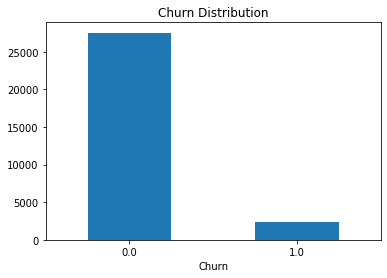

In [67]:
churn_class=pd.value_counts(telecom_num['Churn'], sort=True)
churn_class.plot(kind='bar', rot=0)
plt.title('Churn Distribution')
plt.xlabel('Churn')

#### Handle data imbalance by Performing SMOTE oversampling on the data set:

In [68]:
# Handle the imbalance using SMOTE
smt=SMOTE(random_state=2)
X_train_b, y_train_b=smt.fit_sample(X_train, y_train)

C:\Users\syamg\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### now checking the shape of the test train see if the data imbalance has taken care of

In [69]:
# Display the shape for predictor variables
X_train_b.shape

(38510, 145)

In [70]:
# Display the shape for target variables
y_train_b.shape

(38510,)

In [71]:
# Use PCA
pca=PCA(svd_solver='randomized', random_state=42)

In [72]:
# Fit the model
pca.fit(X_train_b)

PCA(random_state=42, svd_solver='randomized')

In [73]:
# Display the components
pca.components_

array([[ 1.33248542e-01,  1.32821234e-01,  1.14255936e-01, ...,
         1.65878894e-01,  1.82585412e-01, -8.60075502e-02],
       [ 1.61174043e-01,  2.77585589e-02,  4.51879924e-02, ...,
        -3.75576070e-02,  5.70713309e-03, -1.17919683e-01],
       [-8.38948761e-03, -1.75895986e-02,  5.22404954e-02, ...,
         3.99139607e-02,  8.99313863e-02,  1.11427458e-01],
       ...,
       [ 5.36700054e-08, -5.17360551e-06, -4.40660184e-06, ...,
        -3.28899878e-05, -2.93038384e-05, -1.03747337e-07],
       [ 1.05486293e-06,  1.19735667e-05,  1.08142369e-05, ...,
        -1.97030106e-05, -1.83968019e-05, -5.09830493e-07],
       [-0.00000000e+00,  3.15969246e-14,  3.05290510e-14, ...,
        -1.37211162e-14, -1.44915842e-14, -2.82098652e-17]])

In [74]:
# Create the dataframe to show the PCA values
pca_colnames=list(X.columns)
pca_df=pd.DataFrame({'PC1':pca.components_[0], 'PC2':pca.components_[1], 
                     'PC3':pca.components_[2], 'Feature':pca_colnames})
pca_df.head(20)

PC1       PC2       PC3           Feature
0   0.133249  0.161174 -0.008389            arpu_8
1   0.132821  0.027759 -0.017590       onnet_mou_8
2   0.114256  0.045188  0.052240      offnet_mou_8
3   0.018976  0.031894  0.149384     roam_ic_mou_6
4   0.017790  0.029083  0.152497     roam_ic_mou_7
5  -0.009875 -0.004308  0.199854     roam_ic_mou_8
6   0.038062  0.017718  0.133512     roam_og_mou_6
7   0.048429  0.018269  0.138421     roam_og_mou_7
8   0.055671  0.022864  0.115749     roam_og_mou_8
9   0.046579  0.048619 -0.007588  loc_og_t2t_mou_6
10  0.053465  0.053524 -0.016858  loc_og_t2t_mou_7
11  0.039700  0.052032 -0.010085  loc_og_t2t_mou_8
12  0.054487  0.083498  0.013572  loc_og_t2m_mou_6
13  0.065457  0.095961 -0.002545  loc_og_t2m_mou_7
14  0.042013  0.089623  0.008352  loc_og_t2m_mou_8
15  0.025061  0.087493  0.045609  loc_og_t2f_mou_6
16  0.023800  0.084523  0.036036  loc_og_t2f_mou_7
17 -0.013225  0.043981  0.052593  loc_og_t2f_mou_8
18  0.043198 -0.008671 -0.056296  loc_og_t2c_mou_6
19  0.073117  0.004555 -0.093961  loc_og_t2c_mou_7

#### Plotting PCA components on a scatter plot for visualisation

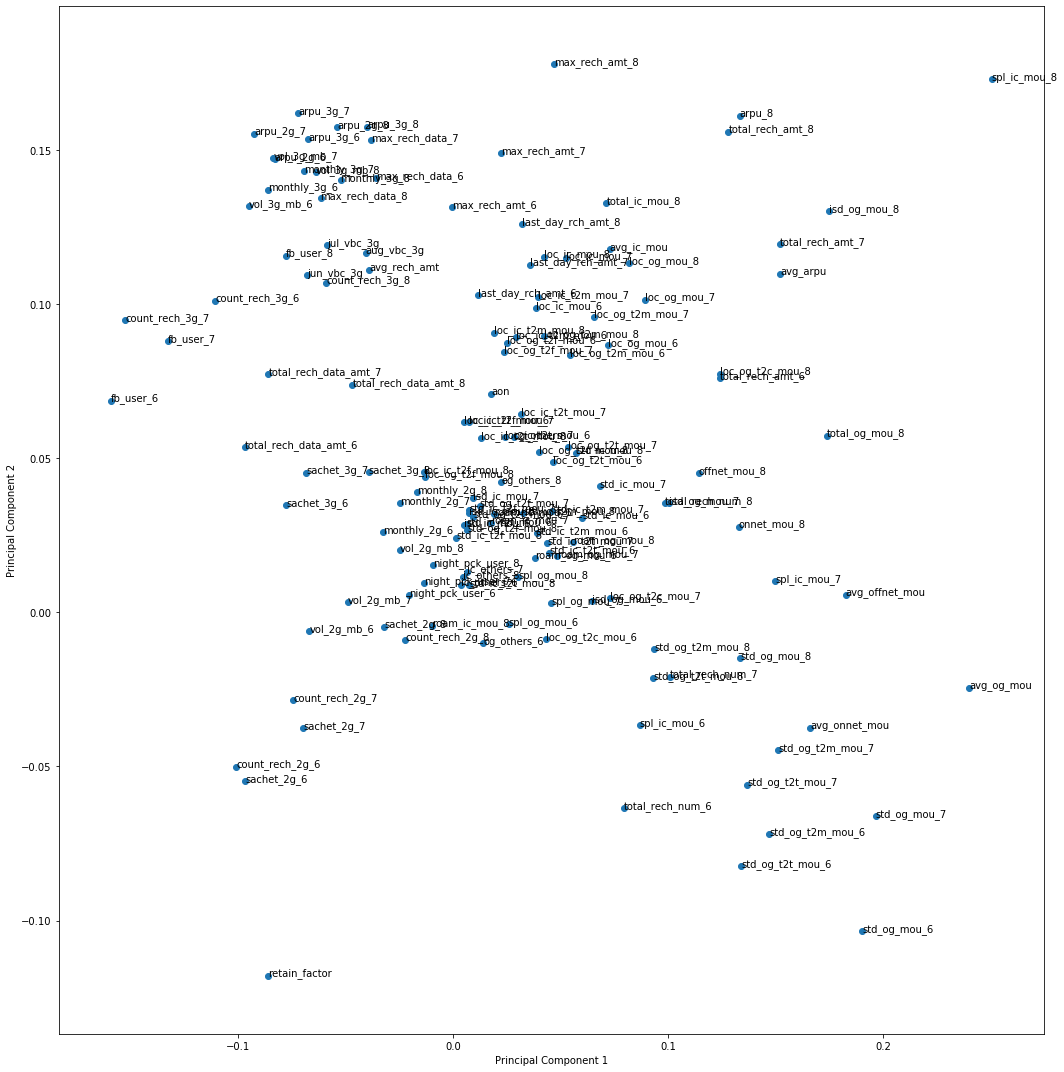

In [75]:
# Plot the PCA
fig = plt.figure(figsize = (15,15))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

#### Plotting Scree plot

In [76]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

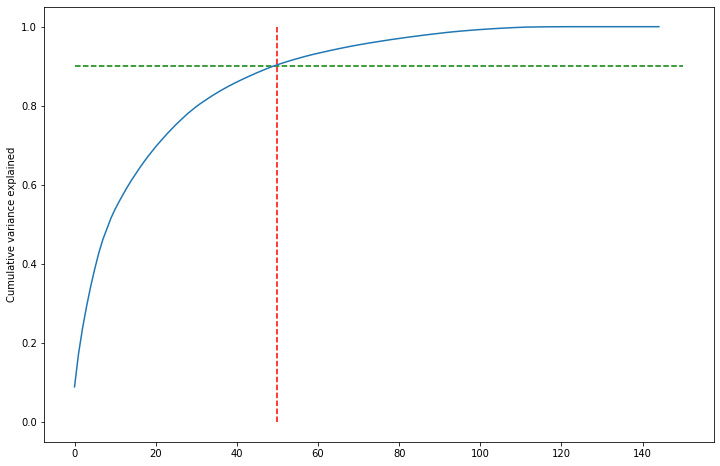

In [77]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=50, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=150, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### From the plot above we can see that around 50 components can describe 90% of the variance in dataset
- We will go ahead with 50 components for modelling

In [78]:
# Will use incremental PCA - Immproves efficiency while handling larger data sets
final_pca=IncrementalPCA(n_components=50)

In [79]:
# creating Dataframe for PCA
pca_df_train=final_pca.fit_transform(X_train_b)
pca_df_train.shape

(38510, 50)

#### Plot correlation matrix to confirm there is minimal to zero correlation

In [80]:
# Creating correlation matrix
corrmat=np.corrcoef(pca_df_train.transpose())

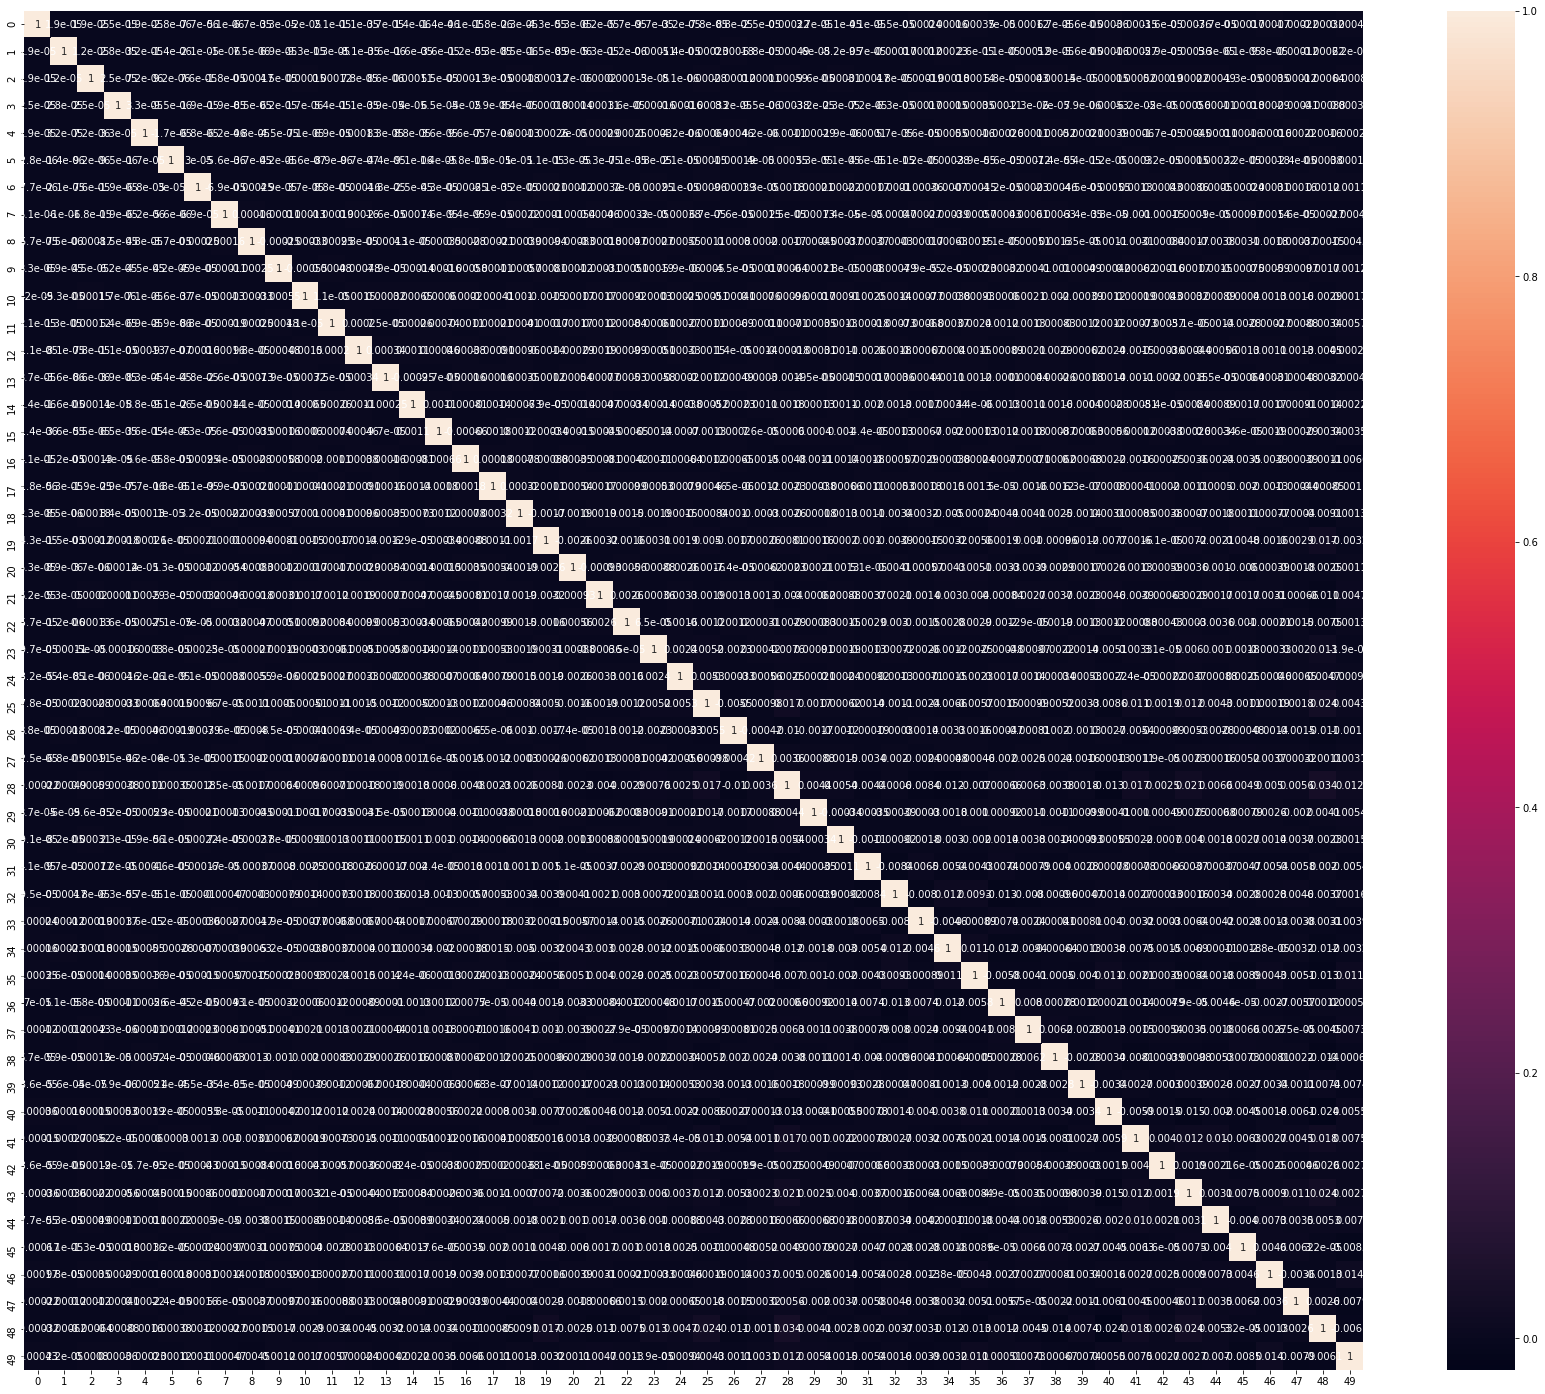

In [81]:
#Plotting correlation matrix
plt.figure(figsize=(30,25))
sns.heatmap(corrmat, annot=True)

In [82]:
# Display Min Max correlation values for a better understanding
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.03357452539391495 , min corr:  -0.023852340820463707


- From above we can clearly see that there is no correlation between any two variables

In [83]:
# Applying the PCA resuts to Test data

pca_telecom_test=final_pca.transform(X_test)
pca_telecom_test.shape

(8971, 50)

#### Logistic Regression with PCA

#### Model 1 - Useing the number of variable defined by PCA

In [84]:
# Initialize Logistic regression for PCA
learner_pca=LogisticRegression()
model_pca=learner_pca.fit(pca_df_train, y_train_b)

In [85]:
# Making predictions on the test data
pred_test=model_pca.predict_proba(pca_telecom_test)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_test))

'0.89'

In [86]:
# Results from the confusion matrix
ypred_pca=model_pca.predict(pca_telecom_test)

In [87]:
confusion_PCA=metrics.confusion_matrix(y_test, ypred_pca)
print(confusion_PCA)

[[7029 1234]
 [ 151  557]]


In [88]:
print(classification_report(y_test, ypred_pca))

              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      8263
         1.0       0.31      0.79      0.45       708

    accuracy                           0.85      8971
   macro avg       0.64      0.82      0.68      8971
weighted avg       0.93      0.85      0.87      8971



##### Model 2 - Using PCA to select the components explaining 90% of variance

In [89]:
pca_model2=PCA(0.90)

In [90]:
pca2_train_df=pca_model2.fit_transform(X_train_b)
pca2_train_df.shape

(38510, 50)

In [91]:
# Train the Regression model
learner_pca2=LogisticRegression()
model_pca2=learner_pca2.fit(pca2_train_df, y_train_b)

In [92]:
pca2_test_df=pca_model2.transform(X_test)
pca2_test_df.shape

(8971, 50)

In [93]:
# Making predictions on the test data
pred_test2=model_pca2.predict_proba(pca2_test_df)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_test2))

'0.89'

In [94]:
# Predicting results from PCA model 2
ypred_pca2=model_pca2.predict(pca2_test_df)

In [95]:
# Confusion Matrix
confusion_PCA2=metrics.confusion_matrix(y_test, ypred_pca2)
print(confusion_PCA2)

[[7033 1230]
 [ 152  556]]


In [96]:
print(classification_report(y_test, ypred_pca2))

              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      8263
         1.0       0.31      0.79      0.45       708

    accuracy                           0.85      8971
   macro avg       0.65      0.82      0.68      8971
weighted avg       0.93      0.85      0.87      8971



#### Model 3 - Using PCA to select components explaining 95% of variance

In [97]:
pca_model3=PCA(0.95)

In [98]:
pca3_train_df=pca_model3.fit_transform(X_train_b)
pca3_train_df.shape

(38510, 69)

In [99]:
# Train the Regression model
learner_pca3=LogisticRegression()
model_pca3=learner_pca3.fit(pca3_train_df, y_train_b)

In [100]:
pca3_test_df=pca_model3.transform(X_test)
pca3_test_df.shape

(8971, 69)

In [101]:
# Making predictions on the test data
pred_test3=model_pca3.predict_proba(pca3_test_df)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_test3))

'0.89'

In [102]:
# Predicting results from PCA model 2
ypred_pca3=model_pca3.predict(pca3_test_df)

In [103]:
# Confusion Matrix
confusion_PCA3=metrics.confusion_matrix(y_test, ypred_pca3)
print(confusion_PCA3)

[[7043 1220]
 [ 152  556]]


In [104]:
# Print the classification report
print(classification_report(y_test, ypred_pca3))

              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      8263
         1.0       0.31      0.79      0.45       708

    accuracy                           0.85      8971
   macro avg       0.65      0.82      0.68      8971
weighted avg       0.93      0.85      0.87      8971



#### Visualise data from model 1 

In [105]:
# define colors for visualizing churn data

def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==0:
            cols.append('red')
        elif l==1:
            cols.append('green')
        else:
            cols.append('blue')
    return cols

# Creating color list

cols=pltcolor(y_train_b)

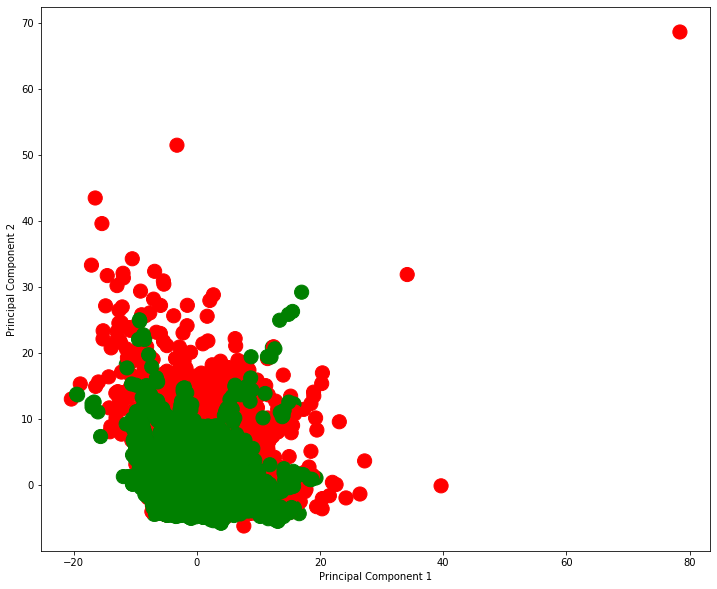

In [106]:
fig = plt.figure(figsize = (12,10))
plt.scatter(pca_df_train[:,0], pca_df_train[:,1], s=200,c = cols)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.gray()
plt.show()

#### Model 4 - PCA by using only 10 Principal components

In [107]:
pca_model4 = PCA(n_components =10)
pca4_train_df=pca_model4.fit_transform(X_train_b)
pca4_train_df.shape

(38510, 10)

In [108]:
#Training the model
learner_pca4=LogisticRegression()
model_pca4=learner_pca4.fit(pca4_train_df, y_train_b)

In [109]:
pca4_test_df=pca_model4.transform(X_test)
pca4_test_df.shape

(8971, 10)

In [110]:
# Making predictions on the test data
pred_test4=model_pca4.predict_proba(pca4_test_df)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_test4))

'0.87'

##### From above we can see that with even 10 Principal components the auc score is 0.87

#### RFE Logistic regression

In [111]:
# Creating a copy of dataframe for RFE
telecom_LR=telecom_num.copy()

- Analyze dataframe for shape and churn details

In [112]:
telecom_LR.shape

(29902, 147)

In [113]:
telecom_LR['Churn'].value_counts()

0.0    27518
1.0     2384
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Churn status Distribution')

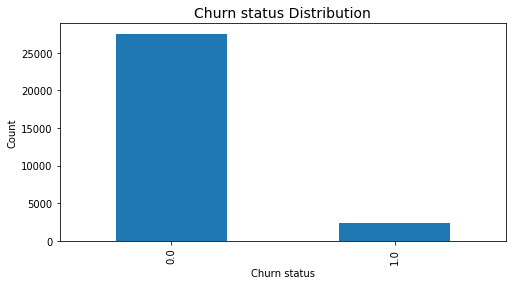

In [114]:
plt.figure(figsize=(8,4))
telecom_LR['Churn'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.title('Churn status Distribution',fontsize=14)

In [115]:
# Create correlation matrix and  drop columns which have more than 0.95 correlation
corr_matrix = telecom_LR.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

['total_rech_amt_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8']


In [116]:
# Dropping highly correlated features
telecom_LR.drop(telecom_LR[to_drop], axis=1, inplace=True)

In [117]:
telecom_LR.shape

(29902, 143)

#### Feature Generation
- Derriving new feature - Retain Factor= bad phase average revenue/good phase average revenue and the ratio of number of recharges inn month 7 Vs month 8

In [118]:
telecom_LR['retain_factor_arpu'] = round(telecom_LR['arpu_8'] / telecom_LR['avg_arpu'],2)
telecom_LR['retain_factor_rech'] = round(telecom_LR['total_rech_num_8'] / telecom_LR['total_rech_num_7'],2)
telecom_LR['retain_factor_rech'] = np.where(telecom_LR['retain_factor_rech'] > 1,1,telecom_LR['retain_factor_rech'])
telecom_LR['retain_factor_arpu'] = np.where(telecom_LR['retain_factor_arpu'] > 1,1,telecom_LR['retain_factor_arpu'])

-  If the Ratio between the ARPU for the bad phase and the good phase is >0.6 and if the Ratio of the Number of recharges is > 0.6
   
- Then the consideration that the customer retention ratio is High and the user is likely not to Churn



In [119]:
#Deduce the factor for retaining the customer
telecom_LR['retain_factor'] = np.where((telecom_LR['retain_factor_arpu'] > 0.6) & (telecom_LR['retain_factor_rech'] > 0.6),0,1)
telecom_LR.drop(columns = ['retain_factor_rech','retain_factor_arpu'], axis=1, inplace=True)

In [120]:
telecom_LR.retain_factor.describe()

count    29902.000000
mean         0.376864
std          0.484609
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: retain_factor, dtype: float64

In [121]:
# Assign feature variable to X
X = telecom_LR.drop(['Churn','mobile_number'],axis=1)
X.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0   213.803         0.00          0.00      54.420449      40.397845   
1  3171.480        52.29        325.91      16.230000      33.490000   
2   137.362        35.08        136.48       0.000000       0.000000   
3   637.760        85.14        983.39       0.000000       0.000000   
4   366.966        33.58        205.89       0.000000       0.000000   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00      23.161293      11.732389           0.00   
1          31.64      23.740000      12.590000          38.06   
2           0.00       0.000000       0.000000           0.00   
3           0.00       0.000000       0.000000           0.00   
4           0.00       0.000000       0.000000           0.00   

   loc_og_t2t_mou_6  ...  night_pck_user_8  fb_user_6  fb_user_7  fb_user_8  \
0            57.394  ...               0.0        1.0        1.0        1.0   
1            51.390  ...               0.0        0.0        0.0        0.0   
2           297.130  ...               0.0        0.0        1.0        1.0   
3             4.480  ...               0.0        0.0        0.0        0.0   
4            48.960  ...               0.0        0.0        1.0        1.0   

    avg_arpu  avg_og_mou  avg_ic_mou  avg_onnet_mou  avg_offnet_mou  \
0   206.1005       0.000       5.440     -58.310533        357.5217   
1  1209.5150     548.385     592.250      56.260000        510.2950   
2   435.4720     470.010      66.175     382.360000         87.6450   
3   556.1030     944.565     169.490     117.260000        827.3050   
4   134.1235     137.210     171.235      49.810000         87.3850   

   retain_factor  
0              0  
1              0  
2              1  
3              0  
4              0  

[5 rows x 141 columns]

In [122]:
# Assign the response variable to y
y_LR = telecom_LR[['Churn']]
y_LR.head()

Churn
0    1.0
1    1.0
2    0.0
3    0.0
4    0.0

In [123]:
# Splitting the data into train and test
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X, y_LR, train_size=0.7, test_size=0.3, random_state=100)

In [124]:
# Show the shape for training set after split
X_train_LR.shape

(20931, 141)

#### Balancing daata by oversampling

In [125]:
smt = SMOTE(random_state = 2) 
X_train_LR,y_train_LR = smt.fit_sample(X_train_LR,y_train_LR)

C:\Users\syamg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\syamg\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [126]:
# Show the shape
X_train_LR.shape

(38510, 141)

In [127]:
# Data imbalance
data_imbalance = (y_train_LR != 0).sum()/(y_train_LR == 0).sum()
print("Imbalance in Training Data: {}".format(data_imbalance))

Imbalance in Train Data: 1.0


In [128]:
# Create the dataframe using the training predictor variables
X_columns = X.columns
X_train_LR = pd.DataFrame(X_train_LR)
X_train_LR.columns = X_columns

# Create the dataframe using the training target variables
y_columns = y_LR.columns
y_train_LR = pd.DataFrame(y_train_LR)
y_train_LR.columns = y_columns

In [129]:
# Display the shape after the training data
y_train_LR.shape

(38510, 1)

#### Scale the variables using StandardScaler:

In [130]:
# Using Standard Scaler for scaling 
scaler = StandardScaler()
X_train_LR[X_columns] = scaler.fit_transform(X_train_LR[X_columns])
X_train_LR.retain_factor.describe()

count    3.851000e+04
mean     3.017710e-14
std      1.000013e+00
min     -1.212750e+00
25%     -1.212750e+00
50%      8.652328e-01
75%      8.652328e-01
max      8.652328e-01
Name: retain_factor, dtype: float64

#### Feature selection using RFE:

In [141]:
# Running RFE with 45 variables as output
lr  = LogisticRegression(max_iter=10000)
rfe = RFE(lr, 45)
rfe = rfe.fit(X_train_LR, y_train_LR.values.ravel())

C:\Users\syamg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=45 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [142]:
# Display the RFE values
rfe.support_

array([ True,  True,  True, False, False, False, False,  True, False,
        True, False,  True,  True, False,  True,  True,  True, False,
       False, False, False,  True,  True, False,  True, False,  True,
        True,  True, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True, False,  True,  True, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
        True, False, False,  True, False, False,  True, False,  True,
        True, False, False,  True, False, False,  True, False, False,
        True, False, False,  True, False, False, False, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False,

In [144]:
# Display columns based on the rankings
list(zip(X_train_LR.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 30),
 ('roam_ic_mou_7', False, 6),
 ('roam_ic_mou_8', False, 45),
 ('roam_og_mou_6', False, 64),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', False, 44),
 ('loc_og_t2t_mou_6', True, 1),
 ('loc_og_t2t_mou_7', False, 76),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', False, 11),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', True, 1),
 ('loc_og_t2f_mou_7', True, 1),
 ('loc_og_t2f_mou_8', False, 21),
 ('loc_og_t2c_mou_6', False, 34),
 ('loc_og_t2c_mou_7', False, 33),
 ('loc_og_t2c_mou_8', False, 81),
 ('loc_og_mou_6', True, 1),
 ('loc_og_mou_7', True, 1),
 ('loc_og_mou_8', False, 43),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', False, 7),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_6', True, 1),
 ('std_og_t2m_mou_7', True, 1),
 ('std_og_t2m_mou_8', False, 42),
 ('std_og_t2f_mou_6', False, 66),
 ('std_og_t2f_mou_7', False, 

In [145]:
# Get all the columns
cols = X_train_LR.columns[rfe.support_]

#### Assess the models using StatsModel:

In [146]:
# Using Stats Model
X_train_sm = sm.add_constant(X_train_LR[cols])
logm2 = sm.GLM(y_train_LR,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

C:\Users\syamg\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38510
Model:                            GLM   Df Residuals:                    38464
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13430.
Date:                Sun, 22 Nov 2020   Deviance:                       26860.
Time:                        19:33:38   Pearson chi2:                 5.30e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1402      0.022     -6.504      0.000      -0.182      -0.098
arpu_8                 0.4365      0.055      8.004      0.000       0.330       0.543
onnet_mou_8            0.4642      0.129      3.600      0.000       0.211       0.717
offnet_mou_8          -0.4339      0.036    -12.155      0.000      -0.504      -0.364
roam_og_mou_7          0.2908      0.020     14.500      0.000       0.252       0.330
loc_og_t2t_mou_6       0.2275      0.215      1.058      0.290      -0.194       0.649
loc_og_t2t_mou_8      -0.6007      0.067     -8.971      0.000      -0.732      -0.469
loc_og_t2m_mou_6      -0.0424      0.251     -0.169      0.866      -0.535       0.450
loc_og_t2m_mou_8      -0.2208      0.044     -5.064      0.000      -0.306      -0.135
loc_og_t2f_mou_6       0.2139      0.043      4.967      0.000       0.130       0.298
loc_og_t2f_mou_7      -0.2177      0.040     -5.501      0.000      -0.295      -0.140
loc_og_mou_6          -0.2612      0.367     -0.711      0.477      -0.982       0.459
loc_og_mou_7           0.2880      0.044      6.558      0.000       0.202       0.374
std_og_t2t_mou_6       2.5882      0.869      2.978      0.003       0.885       4.292
std_og_t2t_mou_8      -0.6991      0.109     -6.406      0.000      -0.913      -0.485
std_og_t2m_mou_6       2.5908      0.910      2.847      0.004       0.807       4.375
std_og_t2m_mou_7       0.2543      0.034      7.588      0.000       0.189       0.320
std_og_mou_6          -3.6181      1.299     -2.786      0.005      -6.164      -1.072
isd_og_mou_8          -0.6015      0.097     -6.187      0.000      -0.792      -0.411
loc_ic_t2t_mou_8    -384.6489     23.129    -16.630      0.000    -429.981    -339.316
loc_ic_t2m_mou_6       0.2215      0.038      5.800      0.000       0.147       0.296
loc_ic_t2m_mou_8    -526.1463     31.624    -16.638      0.000    -588.128    -464.165
loc_ic_t2f_mou_8    -107.7647      6.470    -16.655      0.000    -120.446     -95.083
loc_ic_mou_7           0.5341      0.049     10.991      0.000       0.439       0.629
loc_ic_mou_8         770.3473     46.403     16.601      0.000     679.398     861.296
std_ic_t2t_mou_8      -0.3487      0.048     -7.330      0.000      -0.442      -0.255
std_ic_t2m_mou_7      -0.3296      0.041     -8.006      0.000      -0.410      -0.249
std_ic_mou_7           0.3535      0.052      6.750      0.000       0.251       0.456
spl_ic_mou_8        -178.0745     10.633    -16.747      0.000    -198.915    -157.234
total_rech_num_7       0.2081      0.028      7.527      0.000       0.154       0.262
total_rech_num_8      -0.3552      0.035    -10.268      0.000      -0.423      -0.287
max_rech_amt_8         0.2580      0.028      9.233      0.000       0.203       0.313
last_day_rch_amt_8    -0.5297      0.0

In [147]:
# Show the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.988402
1    0.010807
2    0.453557
3    0.062382
4    0.086449
5    0.008209
6    0.518642
7    0.418949
8    0.907417
9    0.025848
dtype: float64

In [148]:
# Reshape the predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.988402  , 0.01080689, 0.45355747, 0.06238178, 0.08644856,
       0.00820886, 0.51864231, 0.41894901, 0.9074166 , 0.02584771])

In [149]:
#Create a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Churn':y_train_LR.Churn, 'Churn_Prob':y_train_pred})
y_train_pred_final['MobileNumber'] = y_train_LR.index
y_train_pred_final.head()

Churn  Churn_Prob  MobileNumber
0    1.0    0.988402             0
1    0.0    0.010807             1
2    0.0    0.453557             2
3    0.0    0.062382             3
4    0.0    0.086449             4

#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0:

In [150]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Display the sample data
y_train_pred_final.head()

Churn  Churn_Prob  MobileNumber  predicted
0    1.0    0.988402             0          1
1    0.0    0.010807             1          0
2    0.0    0.453557             2          0
3    0.0    0.062382             3          0
4    0.0    0.086449             4          0

In [151]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[16416  2839]
 [ 2718 16537]]


In [152]:
# Find the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8556998182290314


**Note: From above, the overall training accuracy using RFE: 0.855 or 85.6%**

In [155]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_LR[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train_LR[cols].values, i) for i in range(X_train_LR[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features         VIF
23        loc_ic_mou_8  2741300.85
20    loc_ic_t2m_mou_8  1273148.12
18    loc_ic_t2t_mou_8   681058.85
27        spl_ic_mou_8   143931.33
21    loc_ic_t2f_mou_8    53287.13
16        std_og_mou_6     6108.37
14    std_og_t2m_mou_6     2999.14
12    std_og_t2t_mou_6     2737.11
10        loc_og_mou_6      491.09
6     loc_og_t2m_mou_6      228.33
4     loc_og_t2t_mou_6      167.82
1          onnet_mou_8       56.35
13    std_og_t2t_mou_8       40.91
17        isd_og_mou_8       17.45
5     loc_og_t2t_mou_8       11.90
39           arpu_2g_8       10.52
38           arpu_3g_8        9.67
0               arpu_8        8.01
8     loc_og_t2f_mou_6        5.99
11        loc_og_mou_7        5.03
26        std_ic_mou_7        4.83
22        loc_ic_mou_7        4.49
9     loc_og_t2f_mou_7        4.32
40        monthly_3g_8        4.23
29    total_rech_num_8        3.97
25    std_ic_t2m_mou_7        3.72
2         offnet_mou_8        3.66
15    std_og_t2m_mou_7        3.58
37         vol_3g_mb_8        3.57
7     loc_og_t2m_mou_8        3.23
30      max_rech_amt_8        3.20
32     max_rech_data_8        2.97
35     count_rech_3g_8        2.84
19    loc_ic_t2m_mou_6        2.63
28    total_rech_num_7        2.61
43           fb_user_8        2.58
44       retain_factor        2.18
34     count_rech_3g_7        2.09
31  last_day_rch_amt_8        2.07
24    std_ic_t2t_mou_8        1.85
33     count_rech_2g_8        1.76
42          aug_vbc_3g        1.75
3        roam_og_mou_7        1.50
36         vol_2g_mb_8        1.32
41                 aon        1.18

In [156]:
#Drop all variables that have very high VIF i.e. above 9
col = vif[vif['VIF'] < 9]
col = col.Features

In [157]:
# Run the model again using the selected variables
X_train_sm = sm.add_constant(X_train_LR[col])
logm3 = sm.GLM(y_train_LR,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38510
Model:                            GLM   Df Residuals:                    38481
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16415.
Date:                Sun, 22 Nov 2020   Deviance:                       32831.
Time:                        19:40:29   Pearson chi2:                 8.30e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2039      0.015    -13.440      0.000      -0.234      -0.174
arpu_8                -0.1531      0.035     -4.324      0.000      -0.223      -0.084
loc_og_t2f_mou_6       0.1548      0.032      4.908      0.000       0.093       0.217
loc_og_mou_7          -0.1232      0.022     -5.632      0.000      -0.166      -0.080
std_ic_mou_7          -0.1160      0.029     -3.963      0.000      -0.173      -0.059
loc_ic_mou_7          -0.4003      0.029    -14.008      0.000      -0.456      -0.344
loc_og_t2f_mou_7      -0.1223      0.034     -3.611      0.000      -0.189      -0.056
monthly_3g_8           0.0834      0.027      3.127      0.002       0.031       0.136
total_rech_num_8      -0.8227      0.034    -23.854      0.000      -0.890      -0.755
std_ic_t2m_mou_7       0.0174      0.026      0.680      0.497      -0.033       0.068
offnet_mou_8          -0.0167      0.026     -0.635      0.526      -0.068       0.035
std_og_t2m_mou_7       0.1229      0.023      5.328      0.000       0.078       0.168
vol_3g_mb_8            0.0235      0.026      0.896      0.370      -0.028       0.075
loc_og_t2m_mou_8      -0.2657      0.029     -9.011      0.000      -0.323      -0.208
max_rech_amt_8         0.1599      0.025      6.439      0.000       0.111       0.209
max_rech_data_8       -0.0765      0.024     -3.176      0.001      -0.124      -0.029
count_rech_3g_8       -0.0062      0.030     -0.209      0.835      -0.065       0.052
loc_ic_t2m_mou_6       0.2178      0.023      9.377      0.000       0.172       0.263
total_rech_num_7       0.4349      0.026     16.931      0.000       0.385       0.485
fb_user_8             -0.6270      0.023    -27.700      0.000      -0.671      -0.583
retain_factor          0.4551      0.020     22.735      0.000       0.416       0.494
count_rech_3g_7        0.1376      0.023      6.044      0.000       0.093       0.182
last_day_rch_amt_8    -0.6343      0.025    -25.800      0.000      -0.682      -0.586
std_ic_t2t_mou_8       0.1085      0.017      6.383      0.000       0.075       0.142
count_rech_2g_8       -0.2160      0.028     -7.742      0.000      -0.271      -0.161
aug_vbc_3g            -0.4313      0.029    -15.129      0.000      -0.487      -0.375
roam_og_mou_7          0.3900      0.018     22.124      0.000       0.355       0.425
vol_2g_mb_8           -0.2297      0.026     -8.864      0.000      -0.280      -0.179
aon                   -0.3285      0.015    -21.901      0.000      -0.358      -0.299
======================================================================================
"""

In [158]:
# Reshape the model
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.91891972, 0.18480081, 0.81817503, 0.06960839, 0.26787994,
       0.87443353, 0.45746858, 0.23891662, 0.92964689, 0.03894413])

In [159]:
# Assign the updated target values
y_train_pred_final['Churn_Prob'] = y_train_pred

In [160]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  MobileNumber  predicted
0    1.0    0.918920             0          1
1    0.0    0.184801             1          0
2    0.0    0.818175             2          1
3    0.0    0.069608             3          0
4    0.0    0.267880             4          0

In [161]:
# Find the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8137107244871462


#### Perform VIF again using the updated values:

In [162]:
# Calculate the VIF again
vif = pd.DataFrame()
vif['Features'] = X_train_LR[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_LR[col].values, i) for i in range(X_train_LR[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3         std_ic_mou_7  4.53
5     loc_og_t2f_mou_7  4.17
1     loc_og_t2f_mou_6  4.12
7     total_rech_num_8  3.60
8     std_ic_t2m_mou_7  3.58
13      max_rech_amt_8  3.14
0               arpu_8  3.08
11         vol_3g_mb_8  3.03
9         offnet_mou_8  3.00
17    total_rech_num_7  2.47
12    loc_og_t2m_mou_8  2.42
14     max_rech_data_8  2.40
6         monthly_3g_8  2.36
15     count_rech_3g_8  2.34
4         loc_ic_mou_7  2.24
18           fb_user_8  2.17
10    std_og_t2m_mou_7  2.11
21  last_day_rch_amt_8  2.04
19       retain_factor  2.02
20     count_rech_3g_7  2.01
2         loc_og_mou_7  1.98
16    loc_ic_t2m_mou_6  1.93
23     count_rech_2g_8  1.73
24          aug_vbc_3g  1.70
22    std_ic_t2t_mou_8  1.65
26         vol_2g_mb_8  1.29
27                 aon  1.14
25       roam_og_mou_7  1.13

In [163]:
# Runthe model again using the selected variables
X_train_sm = sm.add_constant(X_train_LR[col])
logm4 = sm.GLM(y_train_LR,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38510
Model:                            GLM   Df Residuals:                    38481
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16415.
Date:                Sun, 22 Nov 2020   Deviance:                       32831.
Time:                        19:43:09   Pearson chi2:                 8.30e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2039      0.015    -13.440      0.000      -0.234      -0.174
arpu_8                -0.1531      0.035     -4.324      0.000      -0.223      -0.084
loc_og_t2f_mou_6       0.1548      0.032      4.908      0.000       0.093       0.217
loc_og_mou_7          -0.1232      0.022     -5.632      0.000      -0.166      -0.080
std_ic_mou_7          -0.1160      0.029     -3.963      0.000      -0.173      -0.059
loc_ic_mou_7          -0.4003      0.029    -14.008      0.000      -0.456      -0.344
loc_og_t2f_mou_7      -0.1223      0.034     -3.611      0.000      -0.189      -0.056
monthly_3g_8           0.0834      0.027      3.127      0.002       0.031       0.136
total_rech_num_8      -0.8227      0.034    -23.854      0.000      -0.890      -0.755
std_ic_t2m_mou_7       0.0174      0.026      0.680      0.497      -0.033       0.068
offnet_mou_8          -0.0167      0.026     -0.635      0.526      -0.068       0.035
std_og_t2m_mou_7       0.1229      0.023      5.328      0.000       0.078       0.168
vol_3g_mb_8            0.0235      0.026      0.896      0.370      -0.028       0.075
loc_og_t2m_mou_8      -0.2657      0.029     -9.011      0.000      -0.323      -0.208
max_rech_amt_8         0.1599      0.025      6.439      0.000       0.111       0.209
max_rech_data_8       -0.0765      0.024     -3.176      0.001      -0.124      -0.029
count_rech_3g_8       -0.0062      0.030     -0.209      0.835      -0.065       0.052
loc_ic_t2m_mou_6       0.2178      0.023      9.377      0.000       0.172       0.263
total_rech_num_7       0.4349      0.026     16.931      0.000       0.385       0.485
fb_user_8             -0.6270      0.023    -27.700      0.000      -0.671      -0.583
retain_factor          0.4551      0.020     22.735      0.000       0.416       0.494
count_rech_3g_7        0.1376      0.023      6.044      0.000       0.093       0.182
last_day_rch_amt_8    -0.6343      0.025    -25.800      0.000      -0.682      -0.586
std_ic_t2t_mou_8       0.1085      0.017      6.383      0.000       0.075       0.142
count_rech_2g_8       -0.2160      0.028     -7.742      0.000      -0.271      -0.161
aug_vbc_3g            -0.4313      0.029    -15.129      0.000      -0.487      -0.375
roam_og_mou_7          0.3900      0.018     22.124      0.000       0.355       0.425
vol_2g_mb_8           -0.2297      0.026     -8.864      0.000      -0.280      -0.179
aon                   -0.3285      0.015    -21.901      0.000      -0.358      -0.299
======================================================================================
"""

In [164]:
# Reshape the predicted values
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.91891972, 0.18480081, 0.81817503, 0.06960839, 0.26787994,
       0.87443353, 0.45746858, 0.23891662, 0.92964689, 0.03894413])

In [165]:
# Assign the predicted values
y_train_pred_final['Churn_Prob'] = y_train_pred

In [166]:
# Create new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  MobileNumber  predicted
0    1.0    0.918920             0          1
1    0.0    0.184801             1          0
2    0.0    0.818175             2          1
3    0.0    0.069608             3          0
4    0.0    0.267880             4          0

In [167]:
# Find the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8137107244871462


In [169]:
# Show the classification report
print(classification_report(y_train_pred_final.Churn, y_train_pred_final.predicted))

              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81     19255
         1.0       0.81      0.82      0.82     19255

    accuracy                           0.81     38510
   macro avg       0.81      0.81      0.81     38510
weighted avg       0.81      0.81      0.81     38510



#### Predict on the test dataset:

In [170]:
# Assign the values
X_test_LR = X_test_LR[col]
X_test_LR.head()

arpu_8  loc_og_t2f_mou_6  loc_og_mou_7  std_ic_mou_7  loc_ic_mou_7  \
4265     0.000              0.00          0.00         15.83          7.63   
29217  344.251              3.28        564.28         18.68        518.91   
974   -146.859              6.28        197.68        221.73        162.44   
1602   780.241              0.00          0.00        128.59          4.71   
21099  587.444              7.81        379.66          0.50        788.74   

       loc_og_t2f_mou_7  monthly_3g_8  total_rech_num_8  std_ic_t2m_mou_7  \
4265               0.00           0.0               3.0             15.83   
29217              8.19           0.0               7.0             14.99   
974               27.06           1.0               5.0            208.56   
1602               0.00           0.0              13.0              0.53   
21099             18.29           0.0              25.0              0.00   

       offnet_mou_8  ...  fb_user_8  retain_factor  count_rech_3g_7  \
4265           0.00  ...        0.0              1         1.000000   
29217         71.18  ...        1.0              1         0.000000   
974          268.29  ...        1.0              1         0.023321   
1602          14.68  ...        0.0              0        -1.176386   
21099        286.79  ...        0.0              0        -0.965449   

       last_day_rch_amt_8  std_ic_t2t_mou_8  count_rech_2g_8  aug_vbc_3g  \
4265                  0.0              0.00         0.351780        0.00   
29217                 0.0              2.18         1.000000     1285.81   
974                2000.0              4.73         0.000000        0.00   
1602                130.0             52.98         0.434793        0.00   
21099                10.0              2.91         0.478730        0.00   

       roam_og_mou_7  vol_2g_mb_8     aon  
4265             0.0         0.00   730.0  
29217            0.0       302.37  1536.0  
974             11.9        20.41  2390.0  
1602             0.0         0.00   203.0  
21099            0.0         0.00  1514.0  

[5 rows x 28 columns]

In [171]:
# Add Constant
X_test_sm = sm.add_constant(X_test_LR)
X_test_LR.shape

(8971, 28)

In [172]:
# Prediction on the test set
y_test_pred = res.predict(X_test_sm)
# Display the shape
y_test_pred.shape

(8971,)

In [173]:
# Display the sample values
y_test_pred[:10]

4265     4.613660e-105
29217     0.000000e+00
974       0.000000e+00
1602     2.357452e-118
21099     0.000000e+00
28354     0.000000e+00
25438    2.398443e-160
29071     0.000000e+00
14664     5.331794e-26
4719      0.000000e+00
dtype: float64

In [174]:
# Convert y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Assigning Mobile Number to index
y_test_df['MobileNumber'] = y_test_df.index

In [175]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

Churn  MobileNumber              0
0    1.0          4265  4.613660e-105
1    0.0         29217   0.000000e+00
2    0.0           974   0.000000e+00
3    0.0          1602  2.357452e-118
4    0.0         21099   0.000000e+00

In [176]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_final.describe(percentiles=[.25, .5, .75, .90, .95, .99])

Churn  MobileNumber     Churn_Prob  final_predicted
count  8971.000000   8971.000000   8.971000e+03      8971.000000
mean      0.078921  14991.763906   4.874021e-03         0.004905
std       0.269630   8646.227888   6.931091e-02         0.069865
min       0.000000      3.000000   0.000000e+00         0.000000
25%       0.000000   7568.000000   0.000000e+00         0.000000
50%       0.000000  14968.000000  2.651046e-263         0.000000
75%       0.000000  22565.500000  5.962631e-154         0.000000
90%       0.000000  27005.000000   8.432264e-93         0.000000
95%       1.000000  28419.500000   1.208195e-64         0.000000
99%       1.000000  29600.900000   3.797251e-23         0.000000
max       1.000000  29900.000000   1.000000e+00         1.000000

In [177]:
# Find the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.9208560918515216

In [178]:
# Display the shape
y_pred_final.shape

(8971, 4)

In [179]:
# Generate the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[8240,   23],
       [ 687,   21]], dtype=int64)

In [180]:
# Show the classification report
print(classification_report(y_pred_final.Churn, y_pred_final.final_predicted))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      8263
         1.0       0.48      0.03      0.06       708

    accuracy                           0.92      8971
   macro avg       0.70      0.51      0.51      8971
weighted avg       0.89      0.92      0.89      8971



### Summary of RFE & Logistic Regression Algorithm:
- The Model Accuracy Score that the accuracy on the Test Data Set is High i.e. 0.92
- The confusion matrix is better than the PCA Algorithm
- There were other models created different Hyperparameter VIF settings for e.g. VIF<5 but the accuracy and the precision/recall was not very good
- Hence a Model with a VIF < 9 and and set of 25 variables is chosen here
- The precision and the recall for Churn Probability is still lower than optimal as there are a few False Positives and False Negatives<br>
***The main predictor variables for Telecom Churn are:
<br>total_ic_mou_8 <br>
onnet_mou_8<br>
std_og_t2m_mou_8<br>
arpu_2g_8<br>
total_rech_num_8<br>
loc_ic_t2m_mou_7<br>
max_rech_data_8<br>
loc_ic_t2m_mou_6<br>
total_rech_num_7<br>
std_ic_t2t_mou_8<br>
count_rech_3g_8<br>
retain_factor<br>
std_ic_t2t_mou_7<br>
avg_arpu<br>
loc_ic_t2t_mou_7<br>
aug_vbc_3g<br>
count_rech_2g_8<br>
last_day_rch_amt_8<br>
vol_2g_mb_8<br>
aon***


### Model with Random Forest Algorithm:

In [182]:
# Take a copy first
telecom_LR_RF = telecom_LR.copy()

In [183]:
# Assign feature variable to X
X_RF = telecom_LR_RF.drop(['Churn','mobile_number'],axis=1)
X_RF.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0   213.803         0.00          0.00      54.420449      40.397845   
1  3171.480        52.29        325.91      16.230000      33.490000   
2   137.362        35.08        136.48       0.000000       0.000000   
3   637.760        85.14        983.39       0.000000       0.000000   
4   366.966        33.58        205.89       0.000000       0.000000   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00      23.161293      11.732389           0.00   
1          31.64      23.740000      12.590000          38.06   
2           0.00       0.000000       0.000000           0.00   
3           0.00       0.000000       0.000000           0.00   
4           0.00       0.000000       0.000000           0.00   

   loc_og_t2t_mou_6  ...  night_pck_user_8  fb_user_6  fb_user_7  fb_user_8  \
0            57.394  ...               0.0        1.0        1.0        1.0   
1            51.390  ...               0.0        0.0        0.0        0.0   
2           297.130  ...               0.0        0.0        1.0        1.0   
3             4.480  ...               0.0        0.0        0.0        0.0   
4            48.960  ...               0.0        0.0        1.0        1.0   

    avg_arpu  avg_og_mou  avg_ic_mou  avg_onnet_mou  avg_offnet_mou  \
0   206.1005       0.000       5.440     -58.310533        357.5217   
1  1209.5150     548.385     592.250      56.260000        510.2950   
2   435.4720     470.010      66.175     382.360000         87.6450   
3   556.1030     944.565     169.490     117.260000        827.3050   
4   134.1235     137.210     171.235      49.810000         87.3850   

   retain_factor  
0              0  
1              0  
2              1  
3              0  
4              0  

[5 rows x 141 columns]

In [184]:
# Assign response variable to y
y_RF = telecom_LR_RF['Churn']
y_RF.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Churn, dtype: float64

In [185]:
# Splitting the data into train and test
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(X_RF, y_RF, train_size=0.7, test_size=0.3, random_state=100)

In [186]:
# Use SMOTE
smt = SMOTE(random_state = 2) 
X_train_RF,y_train_RF = smt.fit_sample(X_train_RF,y_train_RF)

# Display the shape
X_train_RF.shape

C:\Users\syamg\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(38510, 141)

In [187]:
# Create the dataframe using train data
X_train_RF = pd.DataFrame(X_train_RF)
X_train_RF.columns = X_RF.columns

# Display the shape
y_train_RF.shape

(38510,)

#### Parameter reduction using L1 LinearVector Classifier:

In [189]:
# Apply parameter reduction
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(X_train_RF.select_dtypes(include=numerics).columns)
X_train_RF = X_train_RF[numerical_vars]
X_train_RF.shape

(38510, 141)

#### Perform L1 Regularisation using LinearSVC Algorithm to do dimensionality reduction:

In [190]:
# Perform L1 regularization
Linear_SVC = LinearSVC(C=0.1, penalty="l1", dual=False).fit(X_train_RF, y_train_RF)
lasso_model = SelectFromModel(Linear_SVC, prefit=False)
lasso_model.fit(scaler.transform(X_train_RF.fillna(0)), y_train_RF)
lasso_model.get_support()

C:\Users\syamg\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\syamg\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,

In [191]:
# Display the sum of coefficient that is zero
np.sum(lasso_model.estimator_.coef_ == 0)

20

In [192]:
# Drop the variables that is not needed
deleted_vars = X_train_RF.columns[(lasso_model.estimator_.coef_ == 0).ravel().tolist()]

#perform the same operation in the Test Data set for matching the columns
X_train_RF.drop(columns = deleted_vars,inplace=True,axis=1)
X_test_RF.drop(columns = deleted_vars,inplace=True,axis=1)

# Display the number of rows and columns
X_train_RF.shape

C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(38510, 121)

 #### Fit the Random Forest with default hyperparameters:

In [194]:
# Random forest with default parameters.
rfc_def = RandomForestClassifier()

# fit the model
rfc_def.fit(X_train_RF,y_train_RF)

RandomForestClassifier()

In [195]:
# Make predictions
predictions = rfc_def.predict(X_test_RF)

In [196]:
# Show the classification report of the default model
print(classification_report(y_test_RF,predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      8263
         1.0       0.64      0.61      0.62       708

    accuracy                           0.94      8971
   macro avg       0.80      0.79      0.80      8971
weighted avg       0.94      0.94      0.94      8971



In [199]:
# Show confusion matrix
print(confusion_matrix(y_test_RF,predictions))

[[8022  241]
 [ 278  430]]


In [200]:
# Display the accuracy score
print(accuracy_score(y_test_RF,predictions))

0.9421469178463939


#### Find the important features using the Decision Tree classifier:

In [202]:
imp = list(rfc_def.feature_importances_)

# Tuples with variable and importance
feature_imp = [(feature, round(imp, 2)) for feature, imp in zip(X_train_RF.columns, imp)]

# Sort the feature importances by most important first
feature_imp = sorted(feature_imp, key = lambda x: x[1], reverse = True)

# Show the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_imp];

Variable: roam_og_mou_8        Importance: 0.13
Variable: roam_ic_mou_8        Importance: 0.08
Variable: retain_factor        Importance: 0.06
Variable: fb_user_8            Importance: 0.05
Variable: arpu_8               Importance: 0.04
Variable: total_ic_mou_8       Importance: 0.04
Variable: loc_ic_mou_8         Importance: 0.03
Variable: spl_ic_mou_8         Importance: 0.03
Variable: max_rech_amt_8       Importance: 0.03
Variable: last_day_rch_amt_8   Importance: 0.03
Variable: loc_og_mou_8         Importance: 0.02
Variable: total_rech_data_amt_8 Importance: 0.02
Variable: onnet_mou_8          Importance: 0.01
Variable: offnet_mou_8         Importance: 0.01
Variable: roam_ic_mou_7        Importance: 0.01
Variable: roam_og_mou_7        Importance: 0.01
Variable: loc_og_t2t_mou_8     Importance: 0.01
Variable: loc_og_t2c_mou_8     Importance: 0.01
Variable: std_og_mou_7         Importance: 0.01
Variable: isd_og_mou_8         Importance: 0.01
Variable: og_others_8          Importan

#### Tune the hyperparameter for improving the model performance:

In [204]:
# Number of folds for k-fold CV
n_folds = 5

# parameters to build the model
parameters = {'max_depth': range(4, 10, 2)}

# Initialize the Random Forest model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train_RF, y_train_RF)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(4, 10, 2)}, return_train_score=True,
             scoring='accuracy')

In [205]:
# Display the scores
scores = rf.cv_results_

pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      15.056164      0.706532         0.137441        0.007320   
1      21.722852      1.223892         0.168390        0.020611   
2      26.528656      0.408273         0.186142        0.020215   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               4  {'max_depth': 4}           0.868476           0.903012   
1               6  {'max_depth': 6}           0.883017           0.917164   
2               8  {'max_depth': 8}           0.896520           0.942742   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.896520           0.902753  ...         0.893846        0.012927   
1           0.914308           0.918203  ...         0.911088        0.014296   
2           0.937808           0.938328  ...         0.931109        0.017380   

   rank_test_score  split0_train_score  split1_train_score  \
0                3            0.904668            0.893404   
1                2            0.925896            0.913075   
2                1            0.952804            0.940340   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.894703            0.894573            0.892593   
1            0.914795            0.913951            0.914178   
2            0.941541            0.939951            0.939918   

   mean_train_score  std_train_score  
0          0.895988         0.004409  
1          0.916379         0.004790  
2          0.942911         0.004982  

[3 rows x 21 columns]

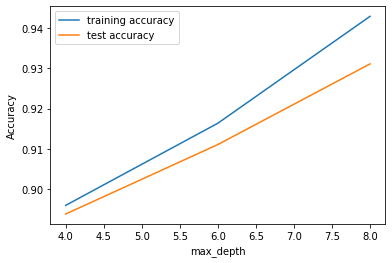

In [206]:
# Plot accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning the estimators:

In [207]:
# Number of folds for k-fold CV
n_folds = 5

# parameters to build the model
parameters = {'n_estimators': range(50, 200, 50)}

# Initialize the model - Specify maximum depth
rf = RandomForestClassifier(max_depth=6)

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="precision", return_train_score=True)
rf.fit(X_train_RF, y_train_RF)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=6),
             param_grid={'n_estimators': range(50, 200, 50)},
             return_train_score=True, scoring='precision')

In [208]:
# Display the scores
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      10.744881      0.535336         0.092550        0.008798   
1      20.891265      0.827245         0.170056        0.006351   
2      31.029012      0.243625         0.241295        0.012267   

  param_n_estimators                 params  split0_test_score  \
0                 50   {'n_estimators': 50}           0.928530   
1                100  {'n_estimators': 100}           0.930009   
2                150  {'n_estimators': 150}           0.929590   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.933067           0.921871           0.921543  ...   
1           0.930677           0.924654           0.921912  ...   
2           0.928249           0.923691           0.920950  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.926222        0.004313                2            0.937746   
1         0.926594        0.003310                1            0.936063   
2         0.925180        0.003227                3            0.936387   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.930038            0.928753            0.927895   
1            0.928333            0.929382            0.927046   
2            0.925764            0.929080            0.927269   

   split4_train_score  mean_train_score  std_train_score  
0            0.928419          0.930570         0.003657  
1            0.927717          0.929708         0.003269  
2            0.926870          0.929074         0.003809  

[3 rows x 21 columns]

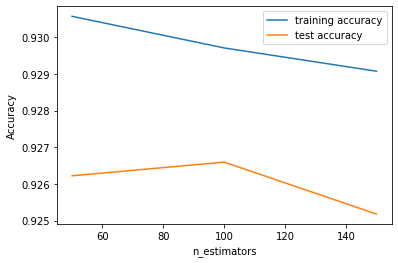

In [209]:
# Plot accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning Max features:

In [210]:
# Number of folds for k-fold CV
n_folds = 5

# Parameters to build the model
parameters = {'max_features': [ 8, 12, 16, 20, 24]}

# Initialize the model
rf = RandomForestClassifier(max_depth = 6)

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train_RF, y_train_RF)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=6),
             param_grid={'max_features': [8, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [211]:
# Display the scores
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      16.025252      0.600730         0.149401        0.013213   
1      20.836907      3.236525         0.156184        0.012339   
2      29.453925      0.319197         0.162039        0.015785   
3      36.339362      0.283342         0.152148        0.004308   
4      43.508636      0.260462         0.144539        0.018733   

  param_max_features                params  split0_test_score  \
0                  8   {'max_features': 8}           0.880810   
1                 12  {'max_features': 12}           0.886393   
2                 16  {'max_features': 16}           0.883537   
3                 20  {'max_features': 20}           0.886004   
4                 24  {'max_features': 24}           0.886523   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.917943           0.911322           0.916126  ...   
1           0.921189           0.915347           0.920280  ...   
2           0.923137           0.919631           0.922098  ...   
3           0.925474           0.920540           0.925993  ...   
4           0.928850           0.923526           0.925084  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.908595        0.014074                5            0.923721   
1         0.913010        0.013503                4            0.927811   
2         0.914048        0.015298                3            0.928622   
3         0.916437        0.015336                2            0.932842   
4         0.918437        0.016077                1            0.933978   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.910575            0.912782            0.911646   
1            0.915444            0.916515            0.915282   
2            0.916807            0.919015            0.917229   
3            0.918787            0.919956            0.919469   
4            0.920280            0.922715            0.920800   

   split4_train_score  mean_train_score  std_train_score  
0            0.910802          0.913905         0.004969  
1            0.915541          0.918119         0.004865  
2            0.917035          0.919742         0.004509  
3            0.918463          0.921903         0.005494  
4            0.921611          0.923877         0.005117  

[5 rows x 21 columns]

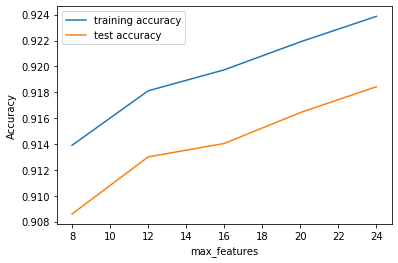

In [212]:
# Plot accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning min_samples_leaf:

In [213]:
# Number of folds for k-fold CV
n_folds = 5

# Parameters to build the model
parameters = {'min_samples_leaf': range(30, 200, 50)}

# Initialize the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,                   
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train_RF, y_train_RF)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(30, 200, 50)},
             return_train_score=True, scoring='accuracy')

In [214]:
# Display the scores
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      33.770574      0.374448         0.233985        0.008178   
1      29.724141      0.639058         0.222948        0.020595   
2      23.765539      3.635963         0.181504        0.044349   
3      24.817858      0.333224         0.203434        0.013264   

  param_min_samples_leaf                     params  split0_test_score  \
0                     30   {'min_samples_leaf': 30}           0.899896   
1                     80   {'min_samples_leaf': 80}           0.887302   
2                    130  {'min_samples_leaf': 130}           0.878213   
3                    180  {'min_samples_leaf': 180}           0.879642   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.950662           0.942872           0.944560  ...   
1           0.928460           0.920021           0.925474  ...   
2           0.916126           0.914048           0.919112  ...   
3           0.913918           0.906518           0.916385  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.936744        0.018606                1            0.957836   
1         0.917865        0.015576                2            0.935828   
2         0.909790        0.015989                3            0.923267   
3         0.906570        0.013941                4            0.921222   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.948293            0.947384            0.946962   
1            0.922001            0.922293            0.923137   
2            0.912393            0.913659            0.912198   
3            0.906096            0.904927            0.907524   

   split4_train_score  mean_train_score  std_train_score  
0            0.945436          0.949182         0.004424  
1            0.921254          0.924903         0.005496  
2            0.914081          0.915119         0.004137  
3            0.909601          0.909874         0.005884  

[4 rows x 21 columns]

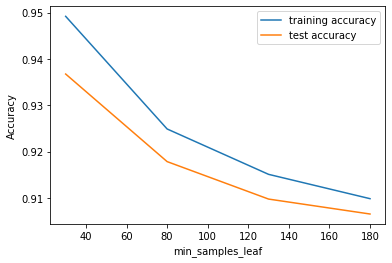

In [215]:
# Plot accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Fit the final model using parameters obtained using Grid Search:

In [216]:
# Build the model using hyperparameter
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=50, 
                             min_samples_split=200,
                             max_features=22,
                             n_estimators=100)

In [217]:
# fit the model
rfc.fit(X_train_RF,y_train_RF)

RandomForestClassifier(max_depth=10, max_features=22, min_samples_leaf=50,
                       min_samples_split=200)

In [218]:
# predict the model
predictions = rfc.predict(X_test_RF)

In [219]:
# Print the classification report
print(classification_report(y_test_RF,predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      8263
         1.0       0.48      0.70      0.57       708

    accuracy                           0.92      8971
   macro avg       0.73      0.82      0.76      8971
weighted avg       0.93      0.92      0.92      8971



In [220]:
# Confusion martix
print(confusion_matrix(y_test_RF,predictions))

[[7721  542]
 [ 212  496]]


In [221]:
# Show the accuracy score
print(accuracy_score(y_test_RF,predictions))

0.9159513989521793


#### Display the numerical feature importance:

In [222]:
imp = list(rfc.feature_importances_)

# Tuples with variable and importance
feature_imp = [(feature, round(imp, 2)) for feature, imp in zip(X_train_RF.columns, imp)]

# Sort the feature importances by most important first
feature_imp = sorted(feature_imp, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_imp];

Variable: roam_og_mou_8        Importance: 0.21
Variable: roam_ic_mou_8        Importance: 0.17
Variable: retain_factor        Importance: 0.13
Variable: total_ic_mou_8       Importance: 0.07
Variable: fb_user_8            Importance: 0.05
Variable: loc_ic_mou_8         Importance: 0.04
Variable: last_day_rch_amt_8   Importance: 0.04
Variable: arpu_8               Importance: 0.03
Variable: loc_og_mou_8         Importance: 0.03
Variable: isd_og_mou_8         Importance: 0.02
Variable: max_rech_amt_8       Importance: 0.02
Variable: total_rech_data_amt_8 Importance: 0.02
Variable: onnet_mou_8          Importance: 0.01
Variable: roam_og_mou_7        Importance: 0.01
Variable: loc_og_t2c_mou_8     Importance: 0.01
Variable: og_others_8          Importance: 0.01
Variable: loc_ic_t2m_mou_8     Importance: 0.01
Variable: spl_ic_mou_8         Importance: 0.01
Variable: total_rech_num_8     Importance: 0.01
Variable: max_rech_data_8      Importance: 0.01
Variable: count_rech_2g_8      Importan

### Summary of Random Forest Algorithm:
- The Model Accuracy Score that the accuracy on the Test Data Set is very High i.e. 0.915
- The model was tuned with a number of Hyperparameters for the yield

**The main predictor variables for Telecom Churn are:
<br>loc_ic_mou_8 <br>
total_ic_mou_8<br>
loc_ic_t2m_mou_8<br>
last_day_rch_amt_8<br>
max_rech_data_8<br>
loc_ic_t2t_mou_8<br>
max_rech_amt_8<br>
count_rech_2g_8<br>
total_og_mou_8<br>
loc_og_t2t_mou_8<br>
total_rech_num_8**

### XGBoost - Queen Bee Algorithm:

In [224]:
# Drop the churn data
x_xgboost, y_xgboost = telecom_num.drop(['Churn'],axis=1),telecom_num[['Churn']]

In [225]:
#Create a matrix for identifying important predictors
data_dmatrix = xgb.DMatrix(data=x_xgboost,label=y_xgboost)

#separate the data into train and test
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(x_xgboost, y_xgboost, test_size=0.3, random_state=123)

#Create XGBoost classifer model
xg_class = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

#Train and Predict based on the model
xg_class.fit(X_train_xg,y_train_xg)

preds = xg_class.predict(X_test_xg)

C:\Users\syamg\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [226]:
# Display the accuracy score
print(accuracy_score(y_test_xg,preds))

0.9457139672277338


In [227]:
# confusion matrix
print(confusion_matrix(y_test_xg,preds))

[[8183  110]
 [ 377  301]]


In [228]:
# create XGBoost algorithm
params = {"objective":"reg:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics="auc", as_pandas=True, seed=123)

cv_results.head()

train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.813215       0.003520       0.807772      0.004967
1        0.867944       0.015718       0.857286      0.017071
2        0.891207       0.012527       0.882628      0.014456
3        0.901805       0.011208       0.893646      0.015336
4        0.906561       0.010702       0.897004      0.015902

In [230]:
# Perform KFold validation to obtain accuracy score
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(xg_class, x_xgboost, y_xgboost, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

C:\Users\syamg\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 94.53% (0.47%)


In [231]:
# Display the classification report
print(classification_report(y_test_xg,preds))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      8293
         1.0       0.73      0.44      0.55       678

    accuracy                           0.95      8971
   macro avg       0.84      0.72      0.76      8971
weighted avg       0.94      0.95      0.94      8971



In [232]:
# Train the model
xg_class1 = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)


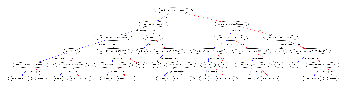

<Figure size 3600x3600 with 0 Axes>

In [233]:
# Plot the model
xgb.plot_tree(xg_class1,num_trees=0)
plt.figure(figsize=(50,50))
plt.show()

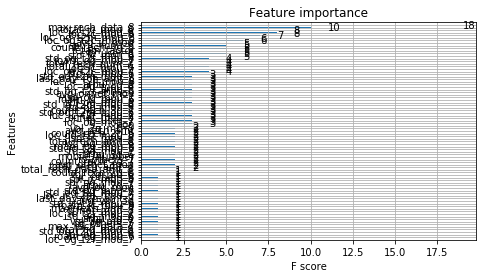

In [234]:
# Plot the feature importance
xgb.plot_importance(xg_class1)
plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

### Final Conclusion:
#### The machine Learning model with XGBoosting Algorithm has been chosen as the best.
***The reason is that the Accuracy scores and the precision or recall scores are the highest of all the algorithms. The accuracy ofor XGBoost - 94.53%***

***Note:The performance of the algorithm is also better than most other algorithms.***